<a href="https://colab.research.google.com/github/mattswalter/Philadelphia_Park_Scores/blob/main/Philadelphia_Parks_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Package Installation

In [336]:
!pip install pyLDAvis==3.2.1 --quiet

In [337]:
pip install corextopic --quiet

In [338]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from google.colab import files
import string
import warnings
warnings.filterwarnings('ignore')
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora


from pprint import pprint
import pickle 

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag

from corextopic import corextopic as ct
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse as ss
from sklearn.feature_extraction.text import CountVectorizer

from scipy.stats import zscore
import seaborn as sns
from scipy import stats

from google.colab import files
import os

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [339]:
import warnings
warnings.filterwarnings(action='once')

### Correlate Tract Demographics and Park Scores

In [396]:
# import all reviews

scores = pd.read_csv('/content/drive/My Drive/philadelphia_all_reviews_7_6_22.csv',error_bad_lines=False)

# remove parks with less than 10 reviews
scores = scores[scores.num_reviews >= 10]

# remove blank text reviews
scores = scores[scores['text'].notna()]

# remove reviews less than 3 letters
scores["text1"]=scores["text"].str.split()
scores["WordsCount"]=scores["text1"].apply(lambda x: len(x))
scores=scores[(scores["WordsCount"]>= 2)&(scores["WordsCount"]>=3)]


p_scores = scores
p_scores



/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,url,place_name,place_score,num_reviews,user_number_reviews,user_number_photos,time,score,...,WordsCount,OBJECTID,ADDRESS_911,PARENT_NAME,OFFICIAL_NAME,ADDRESS_911.1,Unnamed: 6,PUBLIC_NAME,Unnamed: 8,Unnamed: 9
0,0,0,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10,184,48.00,NaN,3 years ago,4,...,33,259.00,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground,NaN,NaN
1,1,1,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10,184,46.00,NaN,6 months ago,5,...,16,259.00,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground,NaN,NaN
2,2,2,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10,184,24.00,NaN,5 months ago,5,...,12,259.00,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground,NaN,NaN
3,3,4,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10,184,35.00,NaN,3 years ago,4,...,42,259.00,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground,NaN,NaN
4,4,5,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10,184,9.00,NaN,5 years ago,4,...,31,259.00,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71920,71920,189561,https://www.google.com/maps/place/Philadelphia...,Philadelphia Zoo,4.50,18108,122.00,NaN,3 years ago,5,...,6,69.00,3400 W GIRARD AVE,West Fairmount Park,NaN,3400 W GIRARD AVE,NaN,Philadelphia Zoo,NaN,NaN
71921,71921,189562,https://www.google.com/maps/place/Philadelphia...,Philadelphia Zoo,4.50,18108,25.00,NaN,3 years ago,5,...,4,69.00,3400 W GIRARD AVE,West Fairmount Park,NaN,3400 W GIRARD AVE,NaN,Philadelphia Zoo,NaN,NaN
71922,71922,192133,https://www.google.com/maps/place/Philadelphia...,Philadelphia Zoo,4.50,18108,1.00,1.00,6 days ago,3,...,11,69.00,3400 W GIRARD AVE,West Fairmount Park,NaN,3400 W GIRARD AVE,NaN,Philadelphia Zoo,NaN,NaN
71923,71923,192306,https://www.google.com/maps/place/Philadelphia...,Philadelphia Zoo,4.50,18108,NaN,NaN,a day ago,5,...,4,69.00,3400 W GIRARD AVE,West Fairmount Park,NaN,3400 W GIRARD AVE,NaN,Philadelphia Zoo,NaN,NaN


In [397]:
# Merge together all reviews from the same park
p_scores = p_scores.groupby('PUBLIC_NAME').first().reset_index()
p_scores.count()

PUBLIC_NAME            285
Unnamed: 0             285
Unnamed: 0.1           285
url                    285
place_name             285
place_score            285
num_reviews            285
user_number_reviews    285
user_number_photos     274
time                   285
score                  285
text                   285
text1                  285
WordsCount             285
OBJECTID               285
ADDRESS_911            282
PARENT_NAME            284
OFFICIAL_NAME          200
ADDRESS_911.1          282
Unnamed: 6               0
Unnamed: 8               0
Unnamed: 9               0
dtype: int64

In [398]:
# Import OD cost matrix data

df = pd.read_csv("/content/drive/MyDrive/od_cost_phil_7_5_22.csv")

# Residential locations within 800 m of a park
df = df[df.Total_Leng < 800]

# Drop rows with the same origin and destination (these are just the same residential areas to different access points of the same park)
df = df.sort_values('Total_Leng', ascending=True).drop_duplicates('Name').sort_index()

# Split "Name" column into GEOID and Public park name columns
df['GEOID'] = df['Name'].str.split('-', n=1).str.get(0)
df['Public_Name'] = df['Name'].str.split('-', n=1).str.get(-1)

# remove extra spaces from new columns
df.GEOID = df.GEOID.str.replace(' ', '')
df.Public_Name = df.Public_Name.str.lstrip()

df

,Unnamed: 0,ObjectID,Name,OriginID,Destinatio,Destinat_1,Total_Leng,Shape_Leng,GEOID,Public_Name
0,0,67702,42101000101 - Ben-Gurion Place,20393,5870,24,588.94,NaN,42101000101,Ben-Gurion Place
3,3,67731,42101000101 - Betsy Ross House,20394,5877,13,311.97,NaN,42101000101,Betsy Ross House
14,14,67719,42101000101 - Christ Church Park,20394,6182,1,53.36,NaN,42101000101,Christ Church Park
27,27,67729,42101000101 - Commerce Street Walk,20394,5876,11,244.92,NaN,42101000101,Commerce Street Walk
40,40,67732,42101000101 - I-95 Park,20394,5669,14,392.46,NaN,42101000101,I-95 Park
...,...,...,...,...,...,...,...,...,...,...
432332,432332,101058,42101980903 - Donald P Finnegan Recreation Center,21537,5981,13,487.14,NaN,42101980903,Donald P Finnegan Recreation Center
432352,432352,101054,42101980903 - Grays Ferry Crescent,21537,8190,9,445.25,NaN,42101980903,Grays Ferry Crescent
432368,432368,101046,42101980903 - Jacob Stinger Park,21537,6602,1,172.81,NaN,42101980903,Jacob Stinger Park
432376,432376,42440,42101980903 - William Lanier Park,19552,6608,9,560.13,NaN,42101980903,William Lanier Park


In [399]:
# Merge park scores with origin cost matrix by each destination point

# public_name column is incorrect, use PUBLIC_NAME column for merge
df = df.merge(p_scores, left_on = 'Public_Name', right_on = 'PUBLIC_NAME')
df

,Unnamed: 0_x,ObjectID,Name,OriginID,Destinatio,Destinat_1,Total_Leng,Shape_Leng,GEOID,Public_Name,...,text1,WordsCount,OBJECTID,ADDRESS_911,PARENT_NAME,OFFICIAL_NAME,ADDRESS_911.1,Unnamed: 6,Unnamed: 8,Unnamed: 9
0,3,67731,42101000101 - Betsy Ross House,20394,5877,13,311.97,NaN,42101000101,Betsy Ross House,...,"[One, of, my, favorite, places, I, visited, wh...",41,368.00,239 ARCH ST,Betsy Ross House,Betsy Ross House,239 ARCH ST,NaN,NaN,NaN
1,91,74793,42101000102 - Betsy Ross House,20620,5877,1,96.74,NaN,42101000102,Betsy Ross House,...,"[One, of, my, favorite, places, I, visited, wh...",41,368.00,239 ARCH ST,Betsy Ross House,Betsy Ross House,239 ARCH ST,NaN,NaN,NaN
2,10100,73232,42101001002 - Betsy Ross House,20575,5877,68,740.59,NaN,42101001002,Betsy Ross House,...,"[One, of, my, favorite, places, I, visited, wh...",41,368.00,239 ARCH ST,Betsy Ross House,Betsy Ross House,239 ARCH ST,NaN,NaN,NaN
3,40,67732,42101000101 - I-95 Park,20394,5669,14,392.46,NaN,42101000101,I-95 Park,...,"[You, can't, deny, history., I, will, definite...",17,387.00,None,I-95 Park,None,None,NaN,NaN,NaN
4,199,67458,42101000102 - I-95 Park,20386,5669,21,543.19,NaN,42101000102,I-95 Park,...,"[You, can't, deny, history., I, will, definite...",17,387.00,None,I-95 Park,None,None,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,413256,381732,42101036303 - Jim Junod Recreation Center,33835,7644,1,75.65,NaN,42101036303,Jim Junod Recreation Center,...,"[Great, playground, and, sprinkles, for, kids,...",12,83.00,12770 DUNKS FERRY RD,Jim Junod Recreation Center,Jim Junod Recreation Center,12770 DUNKS FERRY RD,NaN,NaN,NaN
1645,418133,190957,42101037300 - Franklin Delano Roosevelt Park,24723,7647,1,12.46,NaN,42101037300,Franklin Delano Roosevelt Park,...,"[Attended, the, Flower, Show, at, FDR, Park,, ...",32,11.00,3500 S BROAD ST,Franklin Delano Roosevelt Park,Franklin Delano Roosevelt (FDR) Park,3500 S BROAD ST,NaN,NaN,NaN
1646,421431,206803,42101037800 - Bernard Samuel Playground,25212,7084,1,618.58,NaN,42101037800,Bernard Samuel Playground,...,"[They, just, had, the, playground, redone, and...",54,256.00,3539 GAUL ST,Bernard Samuel Playground,Bernard Samuel Playground,3539 GAUL ST,NaN,NaN,NaN
1647,422401,397985,42101037900 - Bernard Samuel Playground,34495,7083,1,58.21,NaN,42101037900,Bernard Samuel Playground,...,"[They, just, had, the, playground, redone, and...",54,256.00,3539 GAUL ST,Bernard Samuel Playground,Bernard Samuel Playground,3539 GAUL ST,NaN,NaN,NaN


In [400]:
# Read in demographic data for each tract
updated_data = pd.read_csv("/content/drive/MyDrive/phil_demo_10_1_22.csv")

updated_data.head()

,Unnamed: 0,Unnamed: 0.1,GEOID,geometry,ALAND,pop,male,female,white,black,...,grad_degree,owned_home,rented_home,disability,dis_nohealth,recieved_snap,below_pov,unemployed,no_health,med_inc
0,0,0,42101012204,"POLYGON ((-75.220665 40.003944, -75.219231 40....",879459,3873,0.43,0.57,0.16,0.73,...,0.25,0.53,0.47,0.18,0.07,0.15,0.18,0.04,0.05,32356.00
1,1,1,42101012203,"POLYGON ((-75.21389099999999 40.005485, -75.21...",227696,791,0.61,0.39,0.20,0.18,...,0.26,0.00,1.00,0.08,0.00,0.04,0.30,0.02,0.05,51610.00
2,2,2,42101013602,"POLYGON ((-75.186368 39.973537, -75.186045 39....",246812,4031,0.50,0.50,0.78,0.05,...,0.39,0.48,0.52,0.05,0.04,0.03,0.06,0.02,0.03,57500.00
3,3,3,42101034502,"POLYGON ((-75.047286 40.082932, -75.046517 40....",1021734,5427,0.44,0.56,0.60,0.20,...,0.17,0.38,0.62,0.18,0.09,0.26,0.15,0.03,0.11,30840.00
4,4,4,42101000902,"POLYGON ((-75.160172 39.946857, -75.160141 39....",155167,2764,0.47,0.53,0.69,0.05,...,0.31,0.22,0.78,0.17,0.00,0.30,0.14,0.01,0.02,43125.00


In [401]:
# Merge together the park connections and scores with the demographics of each tract
df['geoid_i'] = df['GEOID'].astype(int)
updated_data['geoid_i'] = updated_data['GEOID'].astype(int)
df_n = df.merge(updated_data, right_on='geoid_i',left_on='geoid_i')
df_n

,Unnamed: 0_x,ObjectID,Name,OriginID,Destinatio,Destinat_1,Total_Leng,Shape_Leng,GEOID_x,Public_Name,...,grad_degree,owned_home,rented_home,disability,dis_nohealth,recieved_snap,below_pov,unemployed,no_health,med_inc
0,3,67731,42101000101 - Betsy Ross House,20394,5877,13,311.97,NaN,42101000101,Betsy Ross House,...,0.49,0.30,0.70,0.12,0.00,0.00,0.05,0.05,0.04,72901.00
1,40,67732,42101000101 - I-95 Park,20394,5669,14,392.46,NaN,42101000101,I-95 Park,...,0.49,0.30,0.70,0.12,0.00,0.00,0.05,0.05,0.04,72901.00
2,91,74793,42101000102 - Betsy Ross House,20620,5877,1,96.74,NaN,42101000102,Betsy Ross House,...,0.37,0.42,0.58,0.07,0.07,0.00,0.06,0.04,0.07,78058.00
3,199,67458,42101000102 - I-95 Park,20386,5669,21,543.19,NaN,42101000102,I-95 Park,...,0.37,0.42,0.58,0.07,0.07,0.00,0.06,0.04,0.07,78058.00
4,178,74743,42101000102 - Franklin Square,20619,5370,18,529.12,NaN,42101000102,Franklin Square,...,0.37,0.42,0.58,0.07,0.07,0.00,0.06,0.04,0.07,78058.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,413256,381732,42101036303 - Jim Junod Recreation Center,33835,7644,1,75.65,NaN,42101036303,Jim Junod Recreation Center,...,0.11,0.95,0.05,0.10,0.04,0.04,0.02,0.05,0.05,40363.00
1645,413604,287828,42101036400 - Michael Palmer Playground,28863,5597,2,204.51,NaN,42101036400,Michael Palmer Playground,...,0.08,0.92,0.08,0.20,0.09,0.06,0.36,0.06,0.03,27964.00
1646,431891,380366,42101980300 - Michael Palmer Playground,33728,5595,23,693.92,NaN,42101980300,Michael Palmer Playground,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1647,411392,376054,42101036202 - Corporal Jimmy OConnor Memorial ...,33458,5965,1,306.24,NaN,42101036202,Corporal Jimmy OConnor Memorial Playground,...,0.08,0.86,0.14,0.14,0.00,0.15,0.05,0.05,0.04,39750.00


In [402]:
# Group/average together all of the park scores accessible to a census tract

gdf = df_n.groupby('GEOID_x', as_index=False)['place_score', 'Total_Leng' , 'pop', 'male', 'female', 'white', 'black',
       'nat_amr', 'asian', 'pac_ilndr', 'hispanic', 'other_race', 'mult_rce',
       'med_age', 'over_65', 'under_9', 'us_brn', 'natrzation', 'not_cit',
       'for_born', 'born_in_state', 'eng_lt_vw', 'lt_hs', 'hs_degree',
       'some_college', 'bach_degree', 'grad_degree', 'owned_home',
       'rented_home', 'disability', 'dis_nohealth', 'recieved_snap',
       'below_pov', 'unemployed', 'no_health', 'med_inc'].mean()

# rename columns
gdf = gdf.rename(columns={'place_score': 'Place Score', 'male': 'Male',
                            'female': 'Female', 'white': 'White', 'black': 'Black', 'asian': 'Asian', 
                          'hispanic': 'Hispanic', 'other_race': 'Other Race', 'med_age': 'Median Age', 'over_65': 'Over 65',
                            'under_9': 'Under 9', 'eng_lt_vw': 'Speak English Less than Very Well', 'lt_hs': 'Less than High School', 'hs_degree': 'High School Degree', 
                          'some_college': 'Some College', 'bach_degree': 'Bachelors Degree', 'grad_degree': 'Graduate Degree', 'disability': 'Disability',
                          'recieved_snap': 'Received SNAP', 'below_pov': 'Below Poverty Line', 'no_health': 'No Health Insurance', 'med_inc': 'Median Income','unemployed': 'Unemployed'})       

gdf

<ipython-input-402-99cb03aa003a>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gdf = df_n.groupby('GEOID_x', as_index=False)['place_score', 'Total_Leng' , 'pop', 'male', 'female', 'white', 'black',


,GEOID_x,Place Score,Total_Leng,pop,Male,Female,White,Black,nat_amr,Asian,...,Graduate Degree,owned_home,rented_home,Disability,dis_nohealth,Received SNAP,Below Poverty Line,Unemployed,No Health Insurance,Median Income
0,42101000101,4.50,352.21,1879.00,0.43,0.57,0.83,0.05,0.00,0.10,...,0.49,0.30,0.70,0.12,0.00,0.00,0.05,0.05,0.04,72901.00
1,42101000102,4.53,389.68,2988.00,0.57,0.43,0.88,0.06,0.00,0.02,...,0.37,0.42,0.58,0.07,0.07,0.00,0.06,0.04,0.07,78058.00
2,42101000200,4.50,389.37,3175.00,0.55,0.45,0.28,0.05,0.00,0.60,...,0.13,0.61,0.39,0.08,0.00,0.08,0.18,0.01,0.08,32723.00
3,42101000300,4.47,294.49,3586.00,0.38,0.62,0.62,0.06,0.00,0.16,...,0.38,0.26,0.74,0.10,0.00,0.02,0.08,0.03,0.01,68690.00
4,42101000401,4.47,615.39,2577.00,0.44,0.56,0.61,0.15,0.00,0.19,...,0.39,0.35,0.65,0.14,0.08,0.12,0.20,0.01,0.03,54341.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,42101980500,4.20,63.16,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376,42101980600,4.20,349.24,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377,42101980800,4.08,174.84,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378,42101980903,4.30,560.13,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [403]:
# Calculate correlation matrix between demographics and park score
lsc = gdf[['Place Score', 'Male', 'Female', 'White',
       'Black', 'Asian', 'Hispanic', 'Other Race',
       'Median Age', 'Over 65', 'Under 9', 
       'Speak English Less than Very Well', 'Less than High School',
       'High School Degree', 'Some College', 'Bachelors Degree',
       'Graduate Degree', 'Disability', 'Received SNAP', 'Below Poverty Line',
       'No Health Insurance', 'Median Income','Unemployed']]
corr = lsc.corr(method="spearman")
corr = corr.iloc[1: , :]
corr

,Place Score,Male,Female,White,Black,Asian,Hispanic,Other Race,Median Age,Over 65,...,High School Degree,Some College,Bachelors Degree,Graduate Degree,Disability,Received SNAP,Below Poverty Line,No Health Insurance,Median Income,Unemployed
Male,0.02,1.00,-1.00,0.22,-0.28,0.18,0.19,0.14,-0.06,-0.04,...,-0.07,-0.13,0.10,0.04,-0.12,-0.11,-0.07,0.15,0.10,-0.08
Female,-0.02,-1.00,1.00,-0.22,0.28,-0.18,-0.19,-0.14,0.06,0.04,...,0.07,0.13,-0.10,-0.04,0.12,0.11,0.07,-0.15,-0.10,0.08
White,0.51,0.22,-0.22,1.00,-0.91,0.36,0.21,0.04,0.09,0.35,...,-0.41,-0.55,0.62,0.57,-0.49,-0.69,-0.62,-0.31,0.67,-0.47
Black,-0.35,-0.28,0.28,-0.91,1.00,-0.47,-0.36,-0.21,-0.06,-0.26,...,0.34,0.59,-0.50,-0.42,0.41,0.54,0.50,0.15,-0.53,0.42
Asian,0.19,0.18,-0.18,0.36,-0.47,1.00,0.25,0.20,-0.04,0.13,...,-0.28,-0.35,0.35,0.25,-0.28,-0.27,-0.19,0.10,0.21,-0.14
Hispanic,-0.21,0.19,-0.19,0.21,-0.36,0.25,1.00,0.79,-0.24,-0.29,...,0.14,-0.22,-0.15,-0.23,0.13,0.21,0.19,0.34,-0.18,-0.01
Other Race,-0.27,0.14,-0.14,0.04,-0.21,0.20,0.79,1.00,-0.19,-0.27,...,0.17,-0.11,-0.25,-0.29,0.19,0.30,0.22,0.38,-0.26,0.09
Median Age,0.12,-0.06,0.06,0.09,-0.06,-0.04,-0.24,-0.19,1.00,0.41,...,-0.00,0.10,0.07,0.10,0.11,-0.27,-0.36,-0.19,0.21,-0.12
Over 65,0.33,-0.04,0.04,0.35,-0.26,0.13,-0.29,-0.27,0.41,1.00,...,-0.28,-0.14,0.41,0.44,-0.30,-0.55,-0.60,-0.28,0.55,-0.22
Under 9,-0.43,-0.10,0.10,-0.29,0.20,-0.23,0.19,0.22,-0.33,-0.22,...,0.42,0.26,-0.44,-0.46,0.20,0.51,0.27,0.27,-0.35,0.21


In [404]:
# Rename and reindex dataframe for plotting
corr.rename(index={'place_score': 'Place Score', 'Male': 'Male',
                            'Female': 'Female', 'White': '***White', 'Black': '***Black', 'Asian': '***Asian', 
                          'Hispanic': '***Hispanic', 'Other Race': '***Other Race', 'Median Age': '**Median Age', 'Over 65': '***Over 65',
                            'Under 9': '***Under 9', 'Speak English Less than Very Well': '***Limited English', 'Less than High School': '***No High School', 'High School Degree': '***High School Degree', 
                          'Some College': '***Some College', 'Bachelors Degree': '***Bachelors Degree', 'Graduate Degree': '***Graduate Degree', 'Disability': '***Disability',
                          'Received SNAP': '***Receive SNAP', 'Below Poverty Line': '***Below Poverty', 'No Health Insurance': '***No Health Insurance', 'Median Income': '***Median Income','Unemployed':'***Unemployed'}, inplace=True)

corr1 = corr.reindex(['Place Score','***Graduate Degree', '***Bachelors Degree', '***Median Income', '***White','***Over 65', '***Asian','**Median Age', 'Male', 'Female', '***Hispanic','***Limited English','***Unemployed','***Some College',
'***Black','***No Health Insurance','***Disability','***Under 9','***Below Poverty','***High School Degree','***No High School','***Receive SNAP'])

corr1 = corr1.drop('Place Score')
corr1


,Place Score,Male,Female,White,Black,Asian,Hispanic,Other Race,Median Age,Over 65,...,High School Degree,Some College,Bachelors Degree,Graduate Degree,Disability,Received SNAP,Below Poverty Line,No Health Insurance,Median Income,Unemployed
***Graduate Degree,0.65,0.04,-0.04,0.57,-0.42,0.25,-0.23,-0.29,0.10,0.44,...,-0.75,-0.43,0.78,1.00,-0.57,-0.77,-0.62,-0.44,0.79,-0.40
***Bachelors Degree,0.59,0.10,-0.10,0.62,-0.50,0.35,-0.15,-0.25,0.07,0.41,...,-0.76,-0.47,1.00,0.78,-0.57,-0.75,-0.62,-0.37,0.78,-0.45
***Median Income,0.57,0.10,-0.10,0.67,-0.53,0.21,-0.18,-0.26,0.21,0.55,...,-0.61,-0.35,0.78,0.79,-0.59,-0.84,-0.85,-0.40,1.00,-0.43
***White,0.51,0.22,-0.22,1.00,-0.91,0.36,0.21,0.04,0.09,0.35,...,-0.41,-0.55,0.62,0.57,-0.49,-0.69,-0.62,-0.31,0.67,-0.47
***Over 65,0.33,-0.04,0.04,0.35,-0.26,0.13,-0.29,-0.27,0.41,1.00,...,-0.28,-0.14,0.41,0.44,-0.30,-0.55,-0.60,-0.28,0.55,-0.22
***Asian,0.19,0.18,-0.18,0.36,-0.47,1.00,0.25,0.20,-0.04,0.13,...,-0.28,-0.35,0.35,0.25,-0.28,-0.27,-0.19,0.10,0.21,-0.14
**Median Age,0.12,-0.06,0.06,0.09,-0.06,-0.04,-0.24,-0.19,1.00,0.41,...,-0.00,0.10,0.07,0.10,0.11,-0.27,-0.36,-0.19,0.21,-0.12
Male,0.02,1.00,-1.00,0.22,-0.28,0.18,0.19,0.14,-0.06,-0.04,...,-0.07,-0.13,0.10,0.04,-0.12,-0.11,-0.07,0.15,0.10,-0.08
Female,-0.02,-1.00,1.00,-0.22,0.28,-0.18,-0.19,-0.14,0.06,0.04,...,0.07,0.13,-0.10,-0.04,0.12,0.11,0.07,-0.15,-0.10,0.08
***Hispanic,-0.21,0.19,-0.19,0.21,-0.36,0.25,1.00,0.79,-0.24,-0.29,...,0.14,-0.22,-0.15,-0.23,0.13,0.21,0.19,0.34,-0.18,-0.01


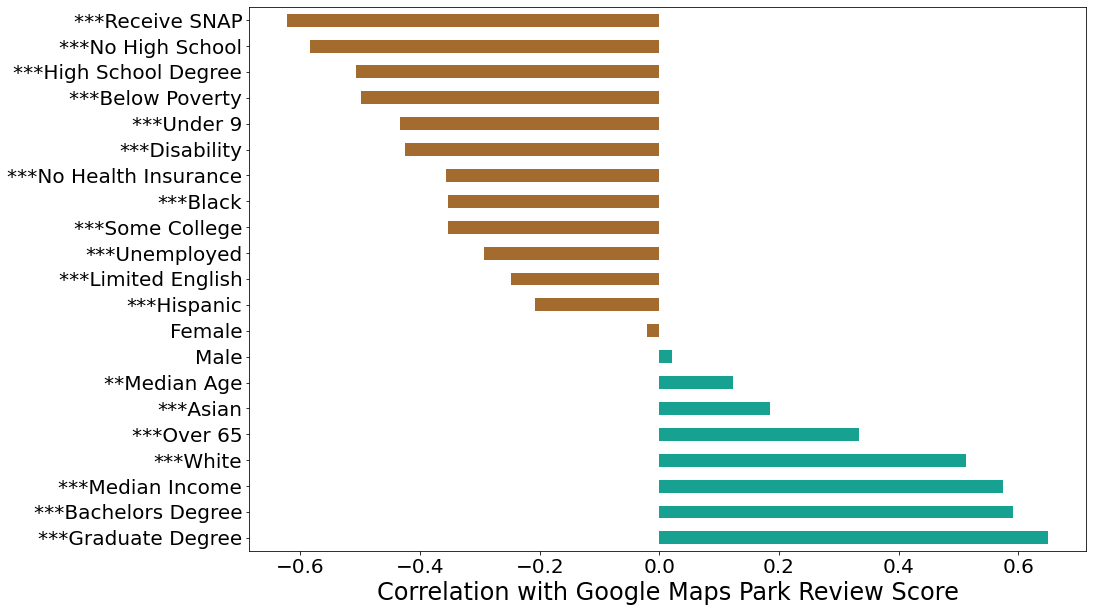

In [405]:
# Plot correlation between tract demographics and park score
plt.rcParams["figure.figsize"] = (15,10)
# '#5dd39e', '#513b56'
corr1['Place Score'].plot(kind='barh', y='Place Score', color=('#17A191', '#17A191','#17A191', '#17A191','#17A191', '#17A191', '#17A191',
                                                              '#17A191','#A46B2F', '#A46B2F', '#A46B2F', '#A46B2F', '#A46B2F', '#A46B2F',
                                                              '#A46B2F','#A46B2F','#A46B2F', '#A46B2F', '#A46B2F', '#A46B2F','#A46B2F'))
plt.grid(False)
plt.rc('axes', axisbelow=True)

plt.xlabel('Correlation with Google Maps Park Review Score', fontsize=24)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)



plt.savefig("demo_correlation_10_19_22.jpg", dpi=300,bbox_inches='tight')

#files.download('demo_correlation_10_19_22.jpg')

In [406]:
# Print p-values of correlation
pd.options.display.float_format = '{:.8f}'.format
c = gdf.columns

cor, pvalue = stats.spearmanr(gdf)
d1 = pd.DataFrame(pvalue)
d1.columns = c
d1.index = c
d1

,GEOID_x,Place Score,Total_Leng,pop,Male,Female,White,Black,nat_amr,Asian,...,Graduate Degree,owned_home,rented_home,Disability,dis_nohealth,Received SNAP,Below Poverty Line,Unemployed,No Health Insurance,Median Income
GEOID_x,0.00000000,0.00345424,0.01918847,0.03228083,0.76687484,0.18277411,0.17368636,0.35631850,0.01040525,0.14348209,...,0.00000014,0.00000001,0.00000000,0.04158344,0.85570655,0.19453255,0.36456903,0.88530932,0.46221945,0.00440381
Place Score,0.00345424,0.00000000,0.85529668,0.00000000,0.65334443,0.72562988,0.00000000,0.00000000,0.16787115,0.00022300,...,0.00000000,0.30761476,0.31592338,0.00000000,0.00000215,0.00000000,0.00000000,0.00000001,0.00000000,0.00000000
Total_Leng,0.01918847,0.85529668,0.00000000,0.00508305,0.03739377,0.07103481,0.16358862,0.12706039,0.37402382,0.96237941,...,0.38215605,0.00068396,0.00105965,0.49122962,0.93908251,0.94420931,0.16716680,0.74163065,0.91993101,0.96472230
pop,0.03228083,0.00000000,0.00508305,0.00000000,0.12771426,0.69450313,0.10322910,0.99577745,0.00102752,0.02166250,...,0.00000017,0.00006359,0.00010282,0.00742041,0.00169739,0.00011082,0.11640587,0.00006980,0.00000001,0.02209672
Male,0.76687484,0.65334443,0.03739377,0.12771426,0.00000000,0.00000000,0.00000389,0.00000001,0.02470461,0.00054712,...,0.17430881,0.15268913,0.42871810,0.08950326,0.14468088,0.05225186,0.15884930,0.26126815,0.00024784,0.00615912
Female,0.18277411,0.72562988,0.07103481,0.69450313,0.00000000,0.00000000,0.00004881,0.00000004,0.08777902,0.00159885,...,0.51760846,0.61144922,0.71000960,0.01590007,0.43220869,0.03921957,0.24039383,0.11767524,0.00401676,0.06684258
White,0.17368636,0.00000000,0.16358862,0.10322910,0.00000389,0.00004881,0.00000000,0.00000000,0.15453345,0.00000000,...,0.00000000,0.00137967,0.00177515,0.00000000,0.04187963,0.00000000,0.00000000,0.00000000,0.00000003,0.00000000
Black,0.35631850,0.00000000,0.12706039,0.99577745,0.00000001,0.00000004,0.00000000,0.00000000,0.02314144,0.00000000,...,0.00000000,0.00576447,0.00461163,0.00000000,0.59933636,0.00000000,0.00000000,0.00000000,0.00929054,0.00000000
nat_amr,0.01040525,0.16787115,0.37402382,0.00102752,0.02470461,0.08777902,0.15453345,0.02314144,0.00000000,0.00203170,...,0.65258724,0.02629762,0.01514344,0.24750423,0.04092956,0.04166593,0.20234621,0.07015310,0.20260652,0.26177568
Asian,0.14348209,0.00022300,0.96237941,0.02166250,0.00054712,0.00159885,0.00000000,0.00000000,0.00203170,0.00000000,...,0.00000076,0.01131335,0.00465218,0.00000003,0.04541526,0.00000077,0.00034189,0.00759137,0.04649015,0.00000670


### Clean reviews for topic modeling - runtime is long and this step can be skipped - the cleaned dataset generated here is imported into next code block

In [384]:
# install autocorrect package
!pip install autocorrect
from autocorrect import spell 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached autocorrect-2.6.1-py3-none-any.whl


/usr/local/lib/python3.8/dist-packages/google/colab/_pip.py:83: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.8/dist-packages/autocorrect-2.6.1.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


In [385]:
# Import all reveiws and filter out blank reviews and reviews less than 3 letters

sc = pd.read_csv('/content/drive/My Drive/philadelphia_all_reviews_7_6_22.csv',error_bad_lines=False)
sc = sc[sc.num_reviews >= 10]

# remove blank text reviews
sc = sc[sc['text'].notna()]

# remove reviews less than 3 letters
sc["text1"]=sc["text"].str.split()
sc["WordsCount"]=sc["text1"].apply(lambda x: len(x))
sc=sc[(sc["WordsCount"]>= 2)&(sc["WordsCount"]>=3)]

sc

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,url,place_name,place_score,num_reviews,user_number_reviews,user_number_photos,time,score,...,WordsCount,OBJECTID,ADDRESS_911,PARENT_NAME,OFFICIAL_NAME,ADDRESS_911.1,Unnamed: 6,PUBLIC_NAME,Unnamed: 8,Unnamed: 9
0,0,0,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10,184,48.00,NaN,3 years ago,4,...,33,259.00,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground,NaN,NaN
1,1,1,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10,184,46.00,NaN,6 months ago,5,...,16,259.00,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground,NaN,NaN
2,2,2,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10,184,24.00,NaN,5 months ago,5,...,12,259.00,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground,NaN,NaN
3,3,4,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10,184,35.00,NaN,3 years ago,4,...,42,259.00,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground,NaN,NaN
4,4,5,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10,184,9.00,NaN,5 years ago,4,...,31,259.00,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71920,71920,189561,https://www.google.com/maps/place/Philadelphia...,Philadelphia Zoo,4.50,18108,122.00,NaN,3 years ago,5,...,6,69.00,3400 W GIRARD AVE,West Fairmount Park,NaN,3400 W GIRARD AVE,NaN,Philadelphia Zoo,NaN,NaN
71921,71921,189562,https://www.google.com/maps/place/Philadelphia...,Philadelphia Zoo,4.50,18108,25.00,NaN,3 years ago,5,...,4,69.00,3400 W GIRARD AVE,West Fairmount Park,NaN,3400 W GIRARD AVE,NaN,Philadelphia Zoo,NaN,NaN
71922,71922,192133,https://www.google.com/maps/place/Philadelphia...,Philadelphia Zoo,4.50,18108,1.00,1.00,6 days ago,3,...,11,69.00,3400 W GIRARD AVE,West Fairmount Park,NaN,3400 W GIRARD AVE,NaN,Philadelphia Zoo,NaN,NaN
71923,71923,192306,https://www.google.com/maps/place/Philadelphia...,Philadelphia Zoo,4.50,18108,NaN,NaN,a day ago,5,...,4,69.00,3400 W GIRARD AVE,West Fairmount Park,NaN,3400 W GIRARD AVE,NaN,Philadelphia Zoo,NaN,NaN


In [386]:
# Text cleaning - Filter out non-Ascii symobls, make all letters lowercase, remove stop words, and remove punctuation

def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

def make_lower_case(text):
    return text.lower()

def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text
    
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

sc['cleaned'] = sc['text'].apply(_removeNonAscii)
sc['cleaned'] = sc.cleaned.apply(func = make_lower_case)
sc['cleaned'] = sc.cleaned.apply(func = remove_stop_words)
sc['cleaned'] = sc.cleaned.apply(func=remove_punctuation)
sc

,Unnamed: 0,Unnamed: 0.1,url,place_name,place_score,num_reviews,user_number_reviews,user_number_photos,time,score,...,OBJECTID,ADDRESS_911,PARENT_NAME,OFFICIAL_NAME,ADDRESS_911.1,Unnamed: 6,PUBLIC_NAME,Unnamed: 8,Unnamed: 9,cleaned
0,0,0,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10,184,48.00,NaN,3 years ago,4,...,259.00,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground,NaN,NaN,nice playground basketball court swimming pool...
1,1,1,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10,184,46.00,NaN,6 months ago,5,...,259.00,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground,NaN,NaN,made better person athletically able communica...
2,2,2,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10,184,24.00,NaN,5 months ago,5,...,259.00,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground,NaN,NaN,great place children play rubber ground
3,3,4,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10,184,35.00,NaN,3 years ago,4,...,259.00,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground,NaN,NaN,pretty side women inviting ever host pleasant ...
4,4,5,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10,184,9.00,NaN,5 years ago,4,...,259.00,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground,NaN,NaN,driving nice way road smooth day this location...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71920,71920,189561,https://www.google.com/maps/place/Philadelphia...,Philadelphia Zoo,4.50,18108,122.00,NaN,3 years ago,5,...,69.00,3400 W GIRARD AVE,West Fairmount Park,NaN,3400 W GIRARD AVE,NaN,Philadelphia Zoo,NaN,NaN,translated google bob nemi mimi original
71921,71921,189562,https://www.google.com/maps/place/Philadelphia...,Philadelphia Zoo,4.50,18108,25.00,NaN,3 years ago,5,...,69.00,3400 W GIRARD AVE,West Fairmount Park,NaN,3400 W GIRARD AVE,NaN,Philadelphia Zoo,NaN,NaN,translated google overwhelming original sobrec...
71922,71922,192133,https://www.google.com/maps/place/Philadelphia...,Philadelphia Zoo,4.50,18108,1.00,1.00,6 days ago,3,...,69.00,3400 W GIRARD AVE,West Fairmount Park,NaN,3400 W GIRARD AVE,NaN,Philadelphia Zoo,NaN,NaN,translated google unkempt dirty original est m...
71923,71923,192306,https://www.google.com/maps/place/Philadelphia...,Philadelphia Zoo,4.50,18108,NaN,NaN,a day ago,5,...,69.00,3400 W GIRARD AVE,West Fairmount Park,NaN,3400 W GIRARD AVE,NaN,Philadelphia Zoo,NaN,NaN,translated google excellent original timo


In [ ]:
# Run spellcheck on reviews (intensive)

sc['cleaned'] = [' '.join([spell(i) for i in x.split()]) for x in sc['cleaned']]

In [390]:
# Tokenize and lemmatize review words

tt = TweetTokenizer()
sc['tokenised_text'] = sc['cleaned'].apply(tt.tokenize)

lmtzr = WordNetLemmatizer()
sc['lemmatize'] = sc['tokenised_text'].apply(
                    lambda lst:[lmtzr.lemmatize(word) for word in lst])

In [389]:
# Export cleaned data
sc.to_csv('text_reviews_cleaned_7_6_20.csv')
from google.colab import files
#files.download("text_reviews_cleaned_7_6_20.csv")

### Process and tokenize review data for topic modeling

In [407]:
# read in park dataset
  # filtered to only include neighborhood parks
  # spellchecked, filtered out invalid characters, stopwords, and tokenized in lemmatize column
sc2 = pd.read_csv('/content/drive/My Drive/phil_cleaned_reviews.csv',error_bad_lines=False)
sc2

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,url,place_name,place_score,num_reviews,user_number_reviews,user_number_photos,time,...,cleaned,tokenised_text,lemmatize,OBJECTID,ADDRESS_911,PARENT_NAME,OFFICIAL_NAME,ADDRESS_911.1,Unnamed: 6,PUBLIC_NAME
0,0,0,0,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10000000,184,48.00000000,NaN,3 years ago,...,playground basketball court swimming pool rub...,"['nice', 'playground', 'basketball', 'court', ...",playground basketball court swimming pool rub...,259,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground
1,1,1,1,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10000000,184,46.00000000,NaN,6 months ago,...,made better person athletically able communica...,"['made', 'better', 'person', 'athletically', '...",made better person athletically able communica...,259,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground
2,2,2,2,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10000000,184,24.00000000,NaN,5 months ago,...,children play rubber ground,"['great', 'place', 'children', 'play', 'rubber...",child play rubber ground,259,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground
3,3,3,4,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10000000,184,35.00000000,NaN,3 years ago,...,pretty side women inviting ever host pleasant ...,"['pretty', 'side', 'women', 'inviting', 'ever'...",pretty side woman inviting ever host pleasant ...,259,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground
4,4,4,5,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10000000,184,9.00000000,NaN,5 years ago,...,driving way road smoo day this location dream ...,"['driving', 'nice', 'way', 'road', 'smooth', '...",driving way road smooth day this location dre...,259,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66862,71920,69681,189561,https://www.google.com/maps/place/Philadelphia...,Philadelphia Zoo,4.50000000,18108,122.00000000,NaN,3 years ago,...,bob semi mini,"['translated', 'google', 'bob', 'semi', 'mini'...",bob semi mini,69,3400 W GIRARD AVE,West Fairmount Park,NaN,3400 W GIRARD AVE,NaN,Philadelphia Zoo
66863,71921,69682,189562,https://www.google.com/maps/place/Philadelphia...,Philadelphia Zoo,4.50000000,18108,25.00000000,NaN,3 years ago,...,overwhelming sobrecogedora,"['translated', 'google', 'overwhelming', 'orig...",overwhelming sobrecogedora,69,3400 W GIRARD AVE,West Fairmount Park,NaN,3400 W GIRARD AVE,NaN,Philadelphia Zoo
66864,71922,69683,192133,https://www.google.com/maps/place/Philadelphia...,Philadelphia Zoo,4.50000000,18108,1.00000000,1.00000000,6 days ago,...,unkempt dirty est muy descuidado socio,"['translated', 'google', 'unkempt', 'dirty', '...",unkempt dirty est muy descuidado socio,69,3400 W GIRARD AVE,West Fairmount Park,NaN,3400 W GIRARD AVE,NaN,Philadelphia Zoo
66865,71923,69684,192306,https://www.google.com/maps/place/Philadelphia...,Philadelphia Zoo,4.50000000,18108,NaN,NaN,a day ago,...,excellent timo,"['translated', 'google', 'excellent', 'origina...",excellent timo,69,3400 W GIRARD AVE,West Fairmount Park,NaN,3400 W GIRARD AVE,NaN,Philadelphia Zoo


In [408]:
# calculate the year a review was left
def color_selector(x):
    if (x['time'] == '4 months ago' or x['time'] == 'a month ago' or x['time'] == '2 months ago' or x['time'] == '7 months ago' or 
        x['time'] == '2 days ago' or x['time'] == '3 months ago' or x['time'] == '3 weeks ago' or 
        x['time'] == 'a week ago' or x['time'] == '2 weeks ago' or x['time'] == 'a day ago' or 
        x['time'] == '5 days ago' or x['time'] == '4 weeks ago' or x['time'] == '6 days ago' or 
        x['time'] == '3 days ago' or x['time'] == '4 days ago' or x['time'] == '6 hours ago' or 
        x['time'] == '58 minutes ago' or x['time'] == '3 hours ago' or x['time'] == 'an hour ago' or 
        x['time'] == '41 minutes ago' or x['time'] == '16 hours ago' or 
        x['time'] == '23 hours ago' or x['time'] == '5 hours ago' or x['time'] == '21 hours ago' or 
        x['time'] == '2 hours ago' or x['time'] == '14 hours ago' or x['time'] == '4 hours ago' or 
        x['time'] == '9 hours ago' or x['time'] == '15 hours ago' or x['time'] == '6 months ago' or x['time'] == '5 months ago'):
        return '0'
    elif (x['time'] == 'a year ago' or x['time'] == '8 months ago' or x['time'] == '10 months ago' or x['time'] == '11 months ago' or x['time'] == '9 months ago'):
        return '1'
    elif (x['time'] == '2 years ago' ):
        return '2'
    elif (x['time'] == '3 years ago' ):
        return '3'
    elif (x['time'] == '4 years ago' ):
        return '4'
    elif (x['time'] == '5 years ago' ):
        return '5'
    elif (x['time'] == '6 years ago' ):
        return '6'
    elif (x['time'] == '7 years ago' ):
        return '7'
    elif (x['time'] == '8 years ago' ):
        return '8'
    elif (x['time'] == '9 years ago' ):
        return '9'
    elif (x['time'] == '10 years ago' ):
        return '10'
    elif (x['time'] == '11 years ago' ):
        return '11'
    else:
        return '-666666'
sc2 = sc2.assign(time_d=sc2.apply(color_selector, axis=1))
sc2['year'] = 2022 - sc2['time_d'].astype(int)

In [409]:
# word frequency
# removed very frequent words: 'from', 'museum', 'zoo','google','translate','translated','original','place', 'park','great','nice','kid','great','nice','love
pd.set_option('max_rows', 100)
v = sc2.lemmatize.str.split(expand=True).stack().value_counts()
w_c = pd.DataFrame(v)
w_c.head(100)

,0
love,7779
animal,6604
beautiful,6339
time,6042
good,5515
fun,4738
family,4653
lot,4508
day,3765
go,3740


In [410]:
# Remove words with less than three characters

sc2['lemmatize'] = sc2.lemmatize.str.replace(r'\b(\w{1,2})\b', '')

# Drop Nans

sc2 = sc2[sc2['lemmatize'].notna()]


<ipython-input-410-110a76d71d71>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  sc2['lemmatize'] = sc2.lemmatize.str.replace(r'\b(\w{1,2})\b', '')


In [411]:
# drop empty reviews
sc2['lemmatize'].replace('', np.nan, inplace=True)
sc2.dropna(subset=['lemmatize'], inplace=True)
sc2

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,url,place_name,place_score,num_reviews,user_number_reviews,user_number_photos,time,...,lemmatize,OBJECTID,ADDRESS_911,PARENT_NAME,OFFICIAL_NAME,ADDRESS_911.1,Unnamed: 6,PUBLIC_NAME,time_d,year
0,0,0,0,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10000000,184,48.00000000,NaN,3 years ago,...,playground basketball court swimming pool rub...,259,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground,3,2019
1,1,1,1,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10000000,184,46.00000000,NaN,6 months ago,...,made better person athletically able communica...,259,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground,0,2022
2,2,2,2,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10000000,184,24.00000000,NaN,5 months ago,...,child play rubber ground,259,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground,0,2022
3,3,3,4,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10000000,184,35.00000000,NaN,3 years ago,...,pretty side woman inviting ever host pleasant ...,259,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground,3,2019
4,4,4,5,https://www.google.com/maps/place/12th+%26+Cam...,12th & Cambria Recreation Center,4.10000000,184,9.00000000,NaN,5 years ago,...,driving way road smooth day this location dre...,259,2900 N 12TH ST,12th and Cambria Playground,NaN,2900 N 12TH ST,NaN,12th and Cambria Playground,5,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66862,71920,69681,189561,https://www.google.com/maps/place/Philadelphia...,Philadelphia Zoo,4.50000000,18108,122.00000000,NaN,3 years ago,...,bob semi mini,69,3400 W GIRARD AVE,West Fairmount Park,NaN,3400 W GIRARD AVE,NaN,Philadelphia Zoo,3,2019
66863,71921,69682,189562,https://www.google.com/maps/place/Philadelphia...,Philadelphia Zoo,4.50000000,18108,25.00000000,NaN,3 years ago,...,overwhelming sobrecogedora,69,3400 W GIRARD AVE,West Fairmount Park,NaN,3400 W GIRARD AVE,NaN,Philadelphia Zoo,3,2019
66864,71922,69683,192133,https://www.google.com/maps/place/Philadelphia...,Philadelphia Zoo,4.50000000,18108,1.00000000,1.00000000,6 days ago,...,unkempt dirty est muy descuidado socio,69,3400 W GIRARD AVE,West Fairmount Park,NaN,3400 W GIRARD AVE,NaN,Philadelphia Zoo,0,2022
66865,71923,69684,192306,https://www.google.com/maps/place/Philadelphia...,Philadelphia Zoo,4.50000000,18108,NaN,NaN,a day ago,...,excellent timo,69,3400 W GIRARD AVE,West Fairmount Park,NaN,3400 W GIRARD AVE,NaN,Philadelphia Zoo,0,2022


In [412]:
# Tokenize dataframe to list of words frome each sentence

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

##### input words here, unique.unique or sc2.cleaned
data = sc2.lemmatize.values.tolist()
data_words = list(sent_to_words(data))


### Corex Semi-supervised Anchored Topic Modeling

In [413]:
# Data to be used in corex model
sc2_c = sc2[['text','lemmatize']]
sc2_c

,text,lemmatize
0,"Nice playground, basketball court and swimming...",playground basketball court swimming pool rub...
1,"Made me a better person, athletically & at bei...",made better person athletically able communica...
2,"Great place for children to play, they have ru...",child play rubber ground
3,Its very pretty in side. The women were not in...,pretty side woman inviting ever host pleasant ...
4,Driving is nice that way because the road is s...,driving way road smooth day this location dre...
...,...,...
66862,(Translated by Google) Bob Nemi Mimi(Original),bob semi mini
66863,(Translated by Google) Overwhelming(Original)S...,overwhelming sobrecogedora
66864,"(Translated by Google) It is very unkempt, dir...",unkempt dirty est muy descuidado socio
66865,(Translated by Google) Excellent(Original)��timo,excellent timo


In [414]:
# Prepare data
stopwords_list = stopwords.words('english')
punctuations = list(set(string.punctuation))

unwanted_list=punctuations+stopwords_list
def clean_text_initial(text):
    text = ' '.join([x.lower() for x in word_tokenize(text) if x.lower() not in unwanted_list and len(x)>1])
    return text.strip()

sc2["lemmatize"]=sc2.lemmatize.apply(lambda text:clean_text_initial(str(text)))


corpus1=sc2.lemmatize.tolist()
vocab=list(set(word_tokenize(" ".join(corpus1))))

# Filter out words in less than 5 documents and more than 50 percent of documents
vectorizer = CountVectorizer(ngram_range=(1,1),vocabulary=vocab, min_df = 5, max_df=.5)
X = vectorizer.fit_transform(corpus1)
word2id=vectorizer.vocabulary_
len(word2id)

10895

In [415]:
#  Transform data into a sparse matrix


# Filter out words in less than 5 documents and more than 50 percent of documents
vectorizer = CountVectorizer(stop_words='english', min_df = 5, max_df=.5, binary=True)
doc_word = vectorizer.fit_transform(sc2.lemmatize)
doc_word = ss.csr_matrix(doc_word)

doc_word.shape # n_docs x m_words

words1 = list(np.asarray(vectorizer.get_feature_names()))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [416]:
# Set anchor words from park categories
# Anchor strength = how many times more a model will consider an anchor word than a non-anchor word
anchor_words = [['safe', 'crime','hurt','dangerous','smoking','drug','violence','needle','creepy','security'], ['sport', 'baseball', 'basketball','recreation','tennis','soccer','walk','hike','workout','swim'],['facility', 'playground', 'court','path','light','bathroom','shelter','fountain','table','bench'], ['nature', 'pond','plant','tree','environment','landscape','flower','river', 'blossom','garden'],
                ['access','cost','open','affordable','entrance','connected','expensive','close','hidden','road'], ['condition', 'clean','maintenance','update','broken','upkeep','dirty','mess','fix','filthy'],['size','acre','expanded', 'crowded', 'overcrowded','large','spacious', 'big','busy','tiny'],['aesthetic','beautiful','pretty','peaceful','atmosphere','ugly','loud','calming','charm', 'view','scenery']]
# Set parameters
anchored_topic_model = ct.Corex(n_hidden=8, seed=3)
# Fit model
anchored_topic_model.fit(doc_word, words=words1, anchors=anchor_words, anchor_strength=12);

In [417]:
# Get probability of each topic
sc2_cor = sc2[['lemmatize','text','score','PUBLIC_NAME']]

topic_ls = ['t_safety','t_recreation', 't_amenities', 't_landscape','t_accessibility','t_condition','t_size','t_aesthetic']
l=0

# remove any existing topic columns from previous runs
for c in [col for col in sc2_cor.columns if col.startswith('topic_')]:
    del sc2_cor[c]

for topic_num in range(0, 8):
    sc2_cor[topic_ls[l]] = anchored_topic_model.log_p_y_given_x[:,topic_num]
    l+=1

# Create a best_topic or dominant topic column
corex_cols = [col for col in sc2_cor if col.startswith('t_')]
sc2_cor['best_topic'] = sc2_cor[corex_cols].idxmax(axis=1)

sc2_cor.head(80)

<ipython-input-417-b50378ba1183>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc2_cor[topic_ls[l]] = anchored_topic_model.log_p_y_given_x[:,topic_num]


,lemmatize,text,score,PUBLIC_NAME,t_safety,t_recreation,t_amenities,t_landscape,t_accessibility,t_condition,t_size,t_aesthetic,best_topic
0,playground basketball court swimming pool rubb...,"Nice playground, basketball court and swimming...",4,12th and Cambria Playground,0.00000000,0.00000000,0.00000000,-16.52131948,-17.21016458,-26.52064471,-16.96882693,-27.68655088,t_safety
1,made better person athletically able communica...,"Made me a better person, athletically & at bei...",5,12th and Cambria Playground,-20.89395713,-21.34367140,-18.43103524,-14.86362167,-16.74630608,-26.56712855,-18.80569087,-21.04585284,t_landscape
2,child play rubber ground,"Great place for children to play, they have ru...",5,12th and Cambria Playground,-17.91117969,-21.33609454,-15.74264990,-18.37213925,-19.04952959,-26.42253714,-18.81239953,-20.15303438,t_amenities
3,pretty side woman inviting ever host pleasant ...,Its very pretty in side. The women were not in...,4,12th and Cambria Playground,-20.21527530,-21.43526937,-17.00768677,-15.63723964,-16.01932951,-24.72076666,-17.39592574,0.00000000,t_aesthetic
4,driving way road smooth day location dream com...,Driving is nice that way because the road is s...,4,12th and Cambria Playground,-16.94725369,-21.35044720,-16.64683615,-17.12882352,0.00000000,-34.12935030,-19.56262640,-20.75199185,t_accessibility
5,grew around always showed service program area...,I grew up around there they have always showed...,4,12th and Cambria Playground,-20.68276432,-24.28459313,-16.58591446,-17.19187167,-17.60675767,-26.62621517,-18.79534158,-20.94305319,t_amenities
6,clean please love play worry going street,Very clean please I love that my kid can play ...,5,12th and Cambria Playground,-18.22851210,-21.33333248,-16.61691848,-18.39137395,-18.72380087,0.00000000,-18.81282199,-20.43126881,t_condition
7,playground child public pool good job maintain...,Nice playground for children with a public poo...,3,12th and Cambria Playground,-19.99512198,-18.51820483,0.00000000,-18.37272327,-18.98946131,-26.57177524,-16.84978070,-20.16825816,t_amenities
8,sign said dog allowed trained dog field back,"The sign said ""no dogs allowed "". I trained my...",3,12th and Cambria Playground,-20.76646980,-17.15083346,-18.68681657,-18.37205269,-15.48323514,-26.56800075,-18.78936301,-26.99509112,t_accessibility
9,playground child public pool good job maintain...,Nice playground for children with a public poo...,3,12th and Cambria Playground,-19.99512198,-18.51820483,0.00000000,-18.37272327,-18.98946131,-26.57177524,-16.84978070,-20.16825816,t_amenities


### Dominant Park Topics based on Z-scores

In [418]:
# Calculate dominant park topic based on z-scores of topic distribution rather than raw values
s_sub = sc2_cor

top_list = ['t_safety',	't_recreation','t_amenities',	't_landscape',	't_accessibility',	't_condition',	't_size',	't_aesthetic']

# Calculate z-scores
z_scores = s_sub[top_list].apply(zscore)
z_scores['dominant_topic'] = z_scores.idxmax(axis=1)
sc2_cor_z = s_sub
sc2_cor_z = sc2_cor_z.drop(top_list, inplace=False, axis=1)
sc2_cor_z = pd.merge(sc2_cor_z,z_scores,right_index=True,left_index=True)
sc2_cor_z


,lemmatize,text,score,PUBLIC_NAME,best_topic,t_safety,t_recreation,t_amenities,t_landscape,t_accessibility,t_condition,t_size,t_aesthetic,dominant_topic
0,playground basketball court swimming pool rubb...,"Nice playground, basketball court and swimming...",4,12th and Cambria Playground,t_safety,6.75470530,3.37946164,3.06045477,0.12269740,0.05819706,-0.20454305,0.12208820,-1.25480656,t_safety
1,made better person athletically able communica...,"Made me a better person, athletically & at bei...",5,12th and Cambria Playground,t_landscape,-0.10773571,-0.20472343,-0.11294655,0.49449001,0.16417815,-0.21132523,-0.29688891,-0.40550121,t_landscape
2,child play rubber ground,"Great place for children to play, they have ru...",5,12th and Cambria Playground,t_amenities,0.87193196,-0.20345106,0.34993172,-0.29240908,-0.36205591,-0.19022876,-0.29841911,-0.29131509,t_safety
3,pretty side woman inviting ever host pleasant ...,Its very pretty in side. The women were not in...,4,12th and Cambria Playground,t_aesthetic,0.11517152,-0.22010523,0.13212140,0.32098104,0.33027572,0.05806639,0.02466965,2.28613685,t_aesthetic
4,driving way road smooth day location dream com...,Driving is nice that way because the road is s...,4,12th and Cambria Playground,t_accessibility,1.18852519,-0.20586127,0.19425159,-0.01355512,3.99032725,-1.31468374,-0.46954115,-0.36791815,t_accessibility
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66862,bob semi mini,(Translated by Google) Bob Nemi Mimi(Original),5,Philadelphia Zoo,t_amenities,-0.21367250,-0.21718745,0.07031276,-0.29788456,-0.36118702,0.23580663,-0.29101839,-0.29131492,t_condition
66863,overwhelming sobrecogedora,(Translated by Google) Overwhelming(Original)S...,5,Philadelphia Zoo,t_size,-0.18649770,-0.20597164,-0.25856344,-0.29240806,-0.34021861,-0.21143988,0.19185328,-0.29131498,t_size
66864,unkempt dirty est muy descuidado socio,"(Translated by Google) It is very unkempt, dir...",3,Philadelphia Zoo,t_condition,-0.25979079,-0.20864059,-2.00879537,-0.33599737,-0.38162164,3.66492550,-2.33282265,-0.29131565,t_condition
66865,excellent timo,(Translated by Google) Excellent(Original)��timo,5,Philadelphia Zoo,t_landscape,-0.23902777,-0.20867388,-0.26223522,-0.29234194,-0.36749639,-0.21594282,-0.21189482,-1.21824735,t_recreation


In [419]:
# Drop all reviews with no topic having a z-score of greater than .5
sc2_cor_filter = sc2_cor_z[(sc2_cor.t_safety >= .5) | (sc2_cor_z.t_amenities >= .5) | (sc2_cor_z.t_recreation >= .5) | (sc2_cor_z.t_landscape >= .5) | (sc2_cor_z.t_accessibility >= .5) | (sc2_cor_z.t_condition >= .5) | (sc2_cor_z.t_size >= .5) | (sc2_cor_z.t_aesthetic >= .5)]
sc2_cor_filter

,lemmatize,text,score,PUBLIC_NAME,best_topic,t_safety,t_recreation,t_amenities,t_landscape,t_accessibility,t_condition,t_size,t_aesthetic,dominant_topic
0,playground basketball court swimming pool rubb...,"Nice playground, basketball court and swimming...",4,12th and Cambria Playground,t_safety,6.75470530,3.37946164,3.06045477,0.12269740,0.05819706,-0.20454305,0.12208820,-1.25480656,t_safety
3,pretty side woman inviting ever host pleasant ...,Its very pretty in side. The women were not in...,4,12th and Cambria Playground,t_aesthetic,0.11517152,-0.22010523,0.13212140,0.32098104,0.33027572,0.05806639,0.02466965,2.28613685,t_aesthetic
4,driving way road smooth day location dream com...,Driving is nice that way because the road is s...,4,12th and Cambria Playground,t_accessibility,1.18852519,-0.20586127,0.19425159,-0.01355512,3.99032725,-1.31468374,-0.46954115,-0.36791815,t_accessibility
6,clean please love play worry going street,Very clean please I love that my kid can play ...,5,12th and Cambria Playground,t_condition,0.76770685,-0.20298724,0.19940273,-0.29672309,-0.28763432,3.66492550,-0.29851548,-0.32689960,t_condition
7,playground child public pool good job maintain...,Nice playground for children with a public poo...,3,12th and Cambria Playground,t_amenities,0.18747899,0.26974954,3.06045477,-0.29254007,-0.34833168,-0.21200320,0.14924190,-0.29326212,t_amenities
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66809,beautiful hermoso parque,(Translated by Google) Beautiful park...(Origi...,5,Philadelphia Zoo,t_aesthetic,-0.26158042,-0.20616310,-1.71699084,-0.32541098,-0.37790335,-0.27410400,-0.31476516,2.28613685,t_aesthetic
66821,beautiful bell,(Translated by Google) Beautiful!(Original)Bello!,5,Philadelphia Zoo,t_aesthetic,-0.13212927,-0.20586876,-0.25846380,-0.29240642,-0.36137148,-0.21154551,-0.29978213,2.28613685,t_aesthetic
66822,beautiful,(Translated by Google) beautiful park(Original),3,Philadelphia Zoo,t_aesthetic,-0.13181242,-0.20586965,-0.25846396,-0.29241065,-0.36128346,-0.21143977,-0.29867137,2.28613685,t_aesthetic
66833,beautiful nervosa,(Translated by Google) Beautifull(Original)Her...,5,Philadelphia Zoo,t_aesthetic,-0.13325815,-0.20586965,-0.25846397,-0.29241070,-0.36128378,-0.21143978,-0.29867170,2.28613685,t_aesthetic


### Correlation between perceived park topics and observed characteristics

In [420]:
# Read in park characteristics and topic distributions
dist = pd.read_csv('/content/drive/My Drive/phil_observed_park_topics.csv',error_bad_lines=False)

dist

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,OID__x,PUBLIC_NAM,Rec_count,Education_count,Facility_count,Maintenance_count,Aesthetic_count,OBJECTID_1,Tree_ration_200buffer,...,t_safety,t_recreation,t_amenities,t_landscape,t_accessibility,t_condition,t_size,t_aesthetic,OID__y,Narcotic Crimes
0,0,1,William H (Billy) Markward Memorial Playground,6,0,0,0,0,1,0.15106086,...,0.55617296,0.35495067,1.07082373,-0.12413767,0.03830047,0.50072775,0.21275531,-0.20757640,432,14
1,1,2,Schuylkill Banks,0,0,0,0,0,2,0.09346444,...,-0.01694218,0.77481083,-0.02475663,0.53671049,-0.13426335,-0.11057098,-0.07982266,0.56168538,1,90
2,2,3,Schuylkill River Park,7,0,0,0,0,3,0.11997814,...,0.01621729,0.57618576,0.12125791,0.42512056,-0.13080817,-0.01723564,0.09246432,0.26048109,2,21
3,3,4,Frankford Boat Launch,0,0,0,0,0,4,0.11138034,...,0.01211404,0.06979632,-0.23419458,0.38711438,0.06630605,0.05839587,-0.10496777,-0.24209133,3,0
4,4,6,Wissahickon Valley Park,11,2,3,1,1,6,0.55451109,...,-0.07506051,0.60754587,-0.11349336,0.34852002,-0.02694269,-0.12048201,-0.07424365,0.47548720,5,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,279,473,Discovery Center at East Fairmount Reservoir,0,0,0,0,0,473,0.54711028,...,-0.25704940,0.03839811,-0.29064998,0.60148891,0.16004474,-0.15031000,-0.42756068,0.65533761,505,2
280,280,474,Chamounix Aerial Adventure Course,0,0,0,0,0,474,0.80612776,...,0.55212890,-0.14712792,-0.15203877,-0.20041318,0.00387785,-0.22451833,-0.13010088,-0.48833895,506,0
281,281,508,Bartrams Mile Trail Greenway,0,0,0,0,0,508,0.24439003,...,-0.26409234,-0.03856136,-0.24561423,1.21776532,-0.19807189,0.13793973,-0.50689109,1.12140207,421,4
282,282,509,Rail Park,0,0,0,0,0,509,0.03673244,...,-0.20641936,0.10946703,0.08450229,0.04335166,0.10633581,-0.12753817,0.07571548,0.48197896,422,57


In [421]:
# Rename and subset columns of observed park characteristics
dist = dist.rename(columns={'Rec_count': 'Sports Facilities',
       'Maintenance_count': 'Maintenance Facilities', 'Aesthetic_count': "Aesthetic Features", 'AREA_sq_m': 'Park Area', 'Collisions_2011_2014': 'Collisions',
       'violent_crimes_total': "Violent Crimes", 'water_perc': 'Water Percentage', 'tree_perc': 'Tree Percentage', 'grass_perc': 'Grass Percentage',
       'built_perc': 'Built Percentage', 't_safety': "Safety", 't_recreation': 'Recreation', 't_amenities': 'Built Amenities', 't_landscape': "Natural Amenities",
       't_accessibility': 'Accessibility', 't_condition': 'Condition', 't_size': "Size", 't_aesthetic': "Aesthetic"})

dist = dist[['Safety','Narcotic Crimes',
       'Recreation', 'Built Amenities',
       'Natural Amenities', 'Accessibility', 'Condition',
       'Size', 'Aesthetic', 'Violent Crimes','Collisions','Built Percentage', 'Grass Percentage', 'Tree Percentage', 'Water Percentage',
       'Sports Facilities','Park Area', 'Aesthetic Features']]

In [422]:
# Correlation between park score and mean of topic distributions for a park
corrMatrix = dist.corr(method="spearman")
corrMatrix = pd.DataFrame(corrMatrix)
corrMatrix

,Safety,Narcotic Crimes,Recreation,Built Amenities,Natural Amenities,Accessibility,Condition,Size,Aesthetic,Violent Crimes,Collisions,Built Percentage,Grass Percentage,Tree Percentage,Water Percentage,Sports Facilities,Park Area,Aesthetic Features
Safety,1.00000000,0.18237946,0.13183703,0.32981181,-0.13132782,-0.03219033,0.39885291,-0.03174503,-0.30937525,0.20783770,0.05159168,0.06729055,0.19628996,-0.17946713,-0.20590880,0.32504907,-0.04065989,-0.15430594
Narcotic Crimes,0.18237946,1.00000000,-0.00178815,-0.01585909,-0.17157303,-0.29933135,0.12543831,-0.16482549,-0.05961197,0.92330915,0.46332588,0.26359090,-0.02487925,-0.15069898,-0.06017719,0.24773766,-0.09928418,0.19137098
Recreation,0.13183703,-0.00178815,1.00000000,0.34037323,-0.04996977,-0.00996420,0.15779319,0.03138041,-0.12143644,0.05695024,-0.06458424,0.06481259,0.23558305,-0.23565954,-0.05418562,0.41702549,0.14394910,-0.09488365
Built Amenities,0.32981181,-0.01585909,0.34037323,1.00000000,-0.31878361,-0.01368584,0.45138341,0.19119525,-0.27881262,-0.00340741,-0.19720794,0.28861594,0.22243541,-0.36552859,-0.28351514,0.51202910,-0.12108698,-0.17912211
Natural Amenities,-0.13132782,-0.17157303,-0.04996977,-0.31878361,1.00000000,0.12274718,-0.19632875,0.13003698,0.51841805,-0.18919071,-0.03041386,-0.33982704,-0.15400519,0.42767988,0.35116233,-0.35462072,0.16171648,0.14879013
Accessibility,-0.03219033,-0.29933135,-0.00996420,-0.01368584,0.12274718,1.00000000,-0.07758768,0.14289037,0.05290769,-0.29786771,-0.02326473,-0.14013815,0.01108910,0.08410421,0.15871509,-0.06124314,0.14613158,-0.01058229
Condition,0.39885291,0.12543831,0.15779319,0.45138341,-0.19632875,-0.07758768,1.00000000,0.05667596,-0.11558627,0.18814214,-0.05714850,0.09144272,0.16330819,-0.23537481,-0.24452967,0.29469044,-0.05629404,-0.18828001
Size,-0.03174503,-0.16482549,0.03138041,0.19119525,0.13003698,0.14289037,0.05667596,1.00000000,0.14359342,-0.16448331,0.03206904,-0.11391691,0.06333285,0.07865062,0.02679504,0.01773381,0.03665797,0.06758018
Aesthetic,-0.30937525,-0.05961197,-0.12143644,-0.27881262,0.51841805,0.05290769,-0.11558627,0.14359342,1.00000000,-0.08298127,0.10166414,-0.29264589,-0.20511199,0.43612535,0.31999095,-0.42828783,0.13718319,0.17929834
Violent Crimes,0.20783770,0.92330915,0.05695024,-0.00340741,-0.18919071,-0.29786771,0.18814214,-0.16448331,-0.08298127,1.00000000,0.46616709,0.20915291,0.01200973,-0.14338212,-0.07041471,0.33600592,-0.01342192,0.16737876


In [423]:
corrMatrix = corrMatrix.drop(['Safety',
       'Recreation', 'Built Amenities',
       'Natural Amenities', 'Accessibility', 'Condition',
       'Size', 'Aesthetic','Collisions'],axis=1)

corrMatrix = corrMatrix.drop(['Violent Crimes','Narcotic Crimes','Collisions','Built Percentage', 'Grass Percentage', 'Tree Percentage', 'Water Percentage',
       'Sports Facilities','Park Area', 'Aesthetic Features'],axis=0)

corrMatrix = corrMatrix.rename(columns={'Built Percentage': 'Built Coverage','Grass Percentage': 'Grass Coverage','Tree Percentage': 'Tree Coverage','Water Percentage': 'Water Coverage'})
corrMatrix

,Narcotic Crimes,Violent Crimes,Built Coverage,Grass Coverage,Tree Coverage,Water Coverage,Sports Facilities,Park Area,Aesthetic Features
Safety,0.18237946,0.20783770,0.06729055,0.19628996,-0.17946713,-0.20590880,0.32504907,-0.04065989,-0.15430594
Recreation,-0.00178815,0.05695024,0.06481259,0.23558305,-0.23565954,-0.05418562,0.41702549,0.14394910,-0.09488365
Built Amenities,-0.01585909,-0.00340741,0.28861594,0.22243541,-0.36552859,-0.28351514,0.51202910,-0.12108698,-0.17912211
Natural Amenities,-0.17157303,-0.18919071,-0.33982704,-0.15400519,0.42767988,0.35116233,-0.35462072,0.16171648,0.14879013
Accessibility,-0.29933135,-0.29786771,-0.14013815,0.01108910,0.08410421,0.15871509,-0.06124314,0.14613158,-0.01058229
Condition,0.12543831,0.18814214,0.09144272,0.16330819,-0.23537481,-0.24452967,0.29469044,-0.05629404,-0.18828001
Size,-0.16482549,-0.16448331,-0.11391691,0.06333285,0.07865062,0.02679504,0.01773381,0.03665797,0.06758018
Aesthetic,-0.05961197,-0.08298127,-0.29264589,-0.20511199,0.43612535,0.31999095,-0.42828783,0.13718319,0.17929834


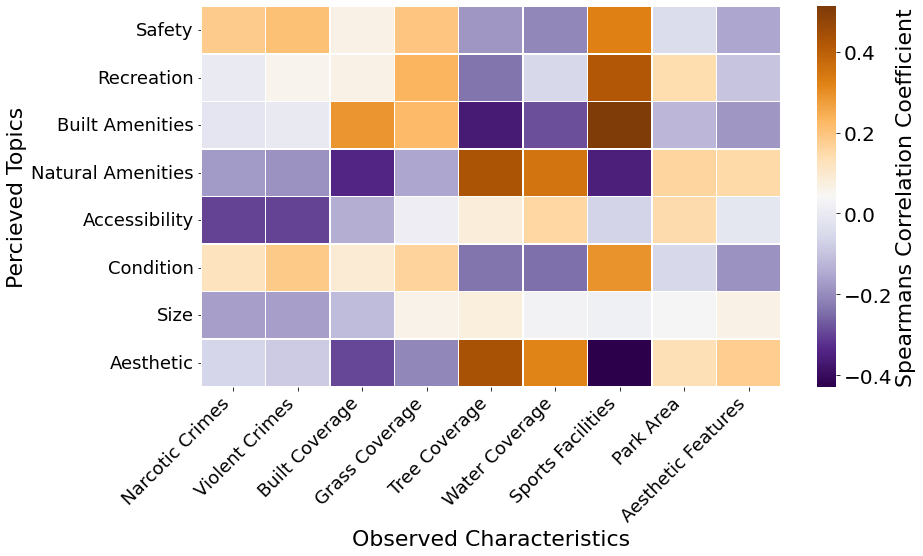

In [424]:
# Define the plot
fig, ax = plt.subplots(figsize=(13,7))

# Add title to the Heat map
title = ""

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticklabels(labels=corrMatrix.columns,color='black',size=18,rotation = 45)
ax.set_yticklabels(labels=corrMatrix.index,color='black',size=18)

# Remove the axes

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#A46B2F","#FFA649","#1BC1AF",'#348AA7'])
sns.heatmap(corrMatrix, cmap='PuOr_r', linewidths=0.5, annot=False,ax=ax)
plt.xticks(rotation=45,ha='right') 
plt.ylabel('Percieved Topics',color='black',size=22)
plt.xlabel('Observed Characteristics',color='black',size=22)  
ax.figure.axes[-1].set_ylabel('Spearmans Correlation Coefficient', size=22)

cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)
plt.savefig("fig5_update.jpg", dpi=300,bbox_inches='tight')

#files.download('fig5_update.jpg')
plt.show()

In [425]:
pd.options.display.float_format = '{:.4f}'.format
c = dist.columns

cor, pvalue = stats.spearmanr(dist)
d1 = pd.DataFrame(pvalue)
d1.columns = c
d1.index = c
d1

,Safety,Narcotic Crimes,Recreation,Built Amenities,Natural Amenities,Accessibility,Condition,Size,Aesthetic,Violent Crimes,Collisions,Built Percentage,Grass Percentage,Tree Percentage,Water Percentage,Sports Facilities,Park Area,Aesthetic Features
Safety,0.0000,0.0020,0.0263,0.0000,0.0269,0.5890,0.0000,0.5942,0.0000,0.0004,0.3864,0.2584,0.0009,0.0024,0.0005,0.0000,0.4949,0.0092
Narcotic Crimes,0.0020,0.0000,0.9761,0.7902,0.0037,0.0000,0.0346,0.0054,0.3168,0.0000,0.0000,0.0000,0.6763,0.0110,0.3122,0.0000,0.0949,0.0012
Recreation,0.0263,0.9761,0.0000,0.0000,0.4015,0.8672,0.0077,0.5985,0.0409,0.3389,0.2780,0.2763,0.0001,0.0001,0.3629,0.0000,0.0152,0.1106
Built Amenities,0.0000,0.7902,0.0000,0.0000,0.0000,0.8184,0.0000,0.0012,0.0000,0.9544,0.0008,0.0000,0.0002,0.0000,0.0000,0.0000,0.0414,0.0024
Natural Amenities,0.0269,0.0037,0.4015,0.0000,0.0000,0.0387,0.0009,0.0284,0.0000,0.0014,0.6098,0.0000,0.0093,0.0000,0.0000,0.0000,0.0063,0.0121
Accessibility,0.5890,0.0000,0.8672,0.8184,0.0387,0.0000,0.1923,0.0160,0.3744,0.0000,0.6962,0.0181,0.8524,0.1575,0.0074,0.3037,0.0137,0.8591
Condition,0.0000,0.0346,0.0077,0.0000,0.0009,0.1923,0.0000,0.3413,0.0517,0.0014,0.3372,0.1242,0.0058,0.0001,0.0000,0.0000,0.3445,0.0014
Size,0.5942,0.0054,0.5985,0.0012,0.0284,0.0160,0.3413,0.0000,0.0154,0.0055,0.5904,0.0552,0.2875,0.1863,0.6530,0.7660,0.5384,0.2563
Aesthetic,0.0000,0.3168,0.0409,0.0000,0.0000,0.3744,0.0517,0.0154,0.0000,0.1631,0.0872,0.0000,0.0005,0.0000,0.0000,0.0000,0.0207,0.0024
Violent Crimes,0.0004,0.0000,0.3389,0.9544,0.0014,0.0000,0.0014,0.0055,0.1631,0.0000,0.0000,0.0004,0.8403,0.0156,0.2369,0.0000,0.8218,0.0047


### Correlation between tract demographics and perceived park topics

In [426]:
# Keep only negative reviews
sc2_cor_filter_i = sc2_cor_filter[(sc2_cor_filter.score <= 3)]
sc2_cor_filter_i

,lemmatize,text,score,PUBLIC_NAME,best_topic,t_safety,t_recreation,t_amenities,t_landscape,t_accessibility,t_condition,t_size,t_aesthetic,dominant_topic
7,playground child public pool good job maintain...,Nice playground for children with a public poo...,3,12th and Cambria Playground,t_amenities,0.1875,0.2697,3.0605,-0.2925,-0.3483,-0.2120,0.1492,-0.2933,t_amenities
9,playground child public pool good job maintain...,Nice playground for children with a public poo...,3,12th and Cambria Playground,t_amenities,0.1875,0.2697,3.0605,-0.2925,-0.3483,-0.2120,0.1492,-0.2933,t_amenities
21,letting anyone swim life guard sitting around,They not letting anyone swim. Life guards was ...,1,12th and Cambria Playground,t_recreation,1.2732,3.3795,0.0967,-0.0762,-0.4390,-0.1944,-0.3792,-0.3357,t_recreation
31,played softball good looking lighting field ni...,Played softball good looking lighting on feild...,3,12th and Cambria Playground,t_recreation,-0.1928,1.0541,0.2511,-0.1918,-0.3606,-0.2114,-0.2985,-0.2908,t_recreation
77,need makeover nonetheless take son ride bike f...,This park needs a makeover nonetheless I take ...,2,29th and Chalmers Playground,t_recreation,0.1725,3.3795,3.0605,-0.3844,-2.2979,-0.9600,-0.1846,-0.3699,t_recreation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66416,good couple animal kind somehow came back feel...,Good for about 3-4 hrs. Couple of animals of e...,3,Philadelphia Zoo,t_size,-0.4937,-1.5664,-2.1515,0.3269,0.0209,-0.2713,0.5412,-1.3191,t_size
66720,really small think took longer drive actually ...,This zoo is really small. I think it took me ...,3,Philadelphia Zoo,t_recreation,-0.1053,3.3795,-0.1113,-0.2838,-0.2205,-0.2114,0.1315,-0.2913,t_recreation
66722,mad bout money paid food high food nasty dirty...,I m mad bout all the money I paid food high fo...,1,Philadelphia Zoo,t_condition,0.0482,-2.0889,-0.2572,0.0225,0.7211,3.6649,-0.2992,-1.3281,t_condition
66822,beautiful,(Translated by Google) beautiful park(Original),3,Philadelphia Zoo,t_aesthetic,-0.1318,-0.2059,-0.2585,-0.2924,-0.3613,-0.2114,-0.2987,2.2861,t_aesthetic


In [427]:
# Group by park name and average topic distributions - get data from review level to park level
sc2_cor_filter_ig = sc2_cor_filter_i.groupby(['PUBLIC_NAME'])['t_safety',	't_recreation',	't_amenities',	't_landscape',	't_accessibility',	't_condition',	't_size',	't_aesthetic'].mean()
sc2_cor_filter_ig = sc2_cor_filter_ig.reset_index(level=0)
sc2_cor_filter_ig

<ipython-input-427-ed90907fe50d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sc2_cor_filter_ig = sc2_cor_filter_i.groupby(['PUBLIC_NAME'])['t_safety',	't_recreation',	't_amenities',	't_landscape',	't_accessibility',	't_condition',	't_size',	't_aesthetic'].mean()


,PUBLIC_NAME,t_safety,t_recreation,t_amenities,t_landscape,t_accessibility,t_condition,t_size,t_aesthetic
0,12th and Cambria Playground,0.3638,1.2433,1.6172,-0.2133,-0.3741,-0.2075,-0.0948,-0.3033
1,29th and Chalmers Playground,-0.2875,-0.1557,1.5647,-0.1789,0.5612,0.9228,0.0971,0.1135
2,33rd and Oxford Driving Range,0.9041,-0.2656,0.1556,-0.7603,2.2717,0.5469,0.1410,-0.5155
3,48th and Woodland Playground,1.2103,0.6355,0.4554,-0.2465,-0.1185,2.9104,0.5598,0.1858
4,8th and Diamond Playground,-0.1892,-0.2058,3.0605,-0.2834,-0.1259,-0.2074,0.0678,-0.4259
...,...,...,...,...,...,...,...,...,...
239,William T Granahan Playground,0.0717,0.2303,1.5076,-0.4749,0.0067,1.2786,-0.4788,-0.1209
240,Wissahickon Neighbors Playground,-0.1318,-0.1943,3.0605,0.1461,0.0709,-0.2114,-0.2987,-0.2913
241,Wissahickon Valley Park,0.1240,0.9193,0.1141,0.1649,0.7651,0.3255,0.2076,0.4535
242,Wissinoming Park,0.1240,0.9193,0.1141,0.1649,0.7651,0.3255,0.2076,0.4535


In [428]:
# Read in data for accessibility of park to tract 
access = pd.read_csv('/content/drive/My Drive/phil_park_topics_accessibility.csv',error_bad_lines=False)
access

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,ObjectID,Name,OriginID,Destinatio,Destinat_1,Total_Leng,Shape_Leng,GEOID_x,...,grad_degree,owned_home,rented_home,disability,dis_nohealth,recieved_snap,below_pov,unemployed,no_health,med_inc
0,0,0,229,42101001800 - Walter Palumbo Recreation Center,17799,6756,1,31.1930,NaN,42101001800,...,0.4034,0.5040,0.4960,0.0610,0.0000,0.0370,0.0544,0.0241,0.0075,61928.0000
1,1,1,60661,42101001800 - Weccacoe Square,20197,6166,2,225.6621,NaN,42101001800,...,0.4034,0.5040,0.4960,0.0610,0.0000,0.0370,0.0544,0.0241,0.0075,61928.0000
2,2,2,60697,42101001800 - Mario Lanza Park,20197,5871,38,537.7746,NaN,42101001800,...,0.4034,0.5040,0.4960,0.0610,0.0000,0.0370,0.0544,0.0241,0.0075,61928.0000
3,3,3,60753,42101001800 - I-95 Park,20197,5318,94,764.4278,NaN,42101001800,...,0.4034,0.5040,0.4960,0.0610,0.0000,0.0370,0.0544,0.0241,0.0075,61928.0000
4,4,4,87901,42101001800 - Solomon Sacks Playground,21076,5294,18,497.0833,NaN,42101001800,...,0.4034,0.5040,0.4960,0.0610,0.0000,0.0370,0.0544,0.0241,0.0075,61928.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,1670,1670,288372,42101035601 - William A Lackman Memorial Playg...,28890,7542,1,39.8120,NaN,42101035601,...,0.0956,0.8090,0.1910,0.2333,0.0000,0.1025,0.0979,0.0120,0.0350,31426.0000
1671,1671,1671,377363,42101035602 - William A Lackman Memorial Playg...,33532,7543,1,486.4625,NaN,42101035602,...,0.1404,0.8855,0.1145,0.1174,0.0000,0.0199,0.0087,0.0222,0.0573,35058.0000
1672,1672,1672,308931,42101035500 - Officer Robert Hayes Memorial Pl...,29953,7747,1,68.6620,NaN,42101035500,...,0.1883,0.7465,0.2535,0.1280,0.0972,0.1493,0.1150,0.0674,0.0910,34410.0000
1673,1673,1673,379634,42101035500 - Officer Robert Hayes Memorial Pl...,33686,7746,1,184.2162,NaN,42101035500,...,0.1883,0.7465,0.2535,0.1280,0.0972,0.1493,0.1150,0.0674,0.0910,34410.0000


In [429]:
# Merge accessibility of park with z-score topic distributions
access1 = access.merge(sc2_cor_filter_ig, left_on='Public_Name',right_on='PUBLIC_NAME')
access1

,Unnamed: 0,Unnamed: 0.1,ObjectID,Name,OriginID,Destinatio,Destinat_1,Total_Leng,Shape_Leng,GEOID_x,...,med_inc,PUBLIC_NAME_y,t_safety,t_recreation,t_amenities,t_landscape,t_accessibility,t_condition,t_size,t_aesthetic
0,0,0,229,42101001800 - Walter Palumbo Recreation Center,17799,6756,1,31.1930,NaN,42101001800,...,61928.0000,Walter Palumbo Recreation Center,0.3829,3.3795,3.0605,0.2106,3.9903,-0.2073,-0.2977,-0.3324
1,21,21,125857,42101001500 - Walter Palumbo Recreation Center,22329,6759,1,9.4442,NaN,42101001500,...,56974.0000,Walter Palumbo Recreation Center,0.3829,3.3795,3.0605,0.2106,3.9903,-0.2073,-0.2977,-0.3324
2,38,38,107252,42101001101 - Walter Palumbo Recreation Center,21719,6752,18,333.7343,NaN,42101001101,...,39244.0000,Walter Palumbo Recreation Center,0.3829,3.3795,3.0605,0.2106,3.9903,-0.2073,-0.2977,-0.3324
3,49,49,94223,42101001002 - Walter Palumbo Recreation Center,21260,6762,96,760.0584,NaN,42101001002,...,74212.0000,Walter Palumbo Recreation Center,0.3829,3.3795,3.0605,0.2106,3.9903,-0.2073,-0.2977,-0.3324
4,60,60,31683,42101000901 - Walter Palumbo Recreation Center,19124,6752,28,699.5650,NaN,42101000901,...,50376.0000,Walter Palumbo Recreation Center,0.3829,3.3795,3.0605,0.2106,3.9903,-0.2073,-0.2977,-0.3324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,1667,1667,281902,42101035702 - Tomlinson and Gifford Playground,28589,6557,1,550.2184,NaN,42101035702,...,25298.0000,Tomlinson and Gifford Playground,-0.1255,0.8493,0.9793,-0.2569,-0.1646,2.1461,0.2067,-0.3365
1477,1665,1665,384013,42101035701 - William A Lackman Memorial Playg...,33978,7543,1,615.4417,NaN,42101035701,...,25373.0000,William A Lackman Memorial Playground,0.0719,0.5806,2.2950,0.7343,0.8323,-0.2093,-0.0376,-0.4041
1478,1670,1670,288372,42101035601 - William A Lackman Memorial Playg...,28890,7542,1,39.8120,NaN,42101035601,...,31426.0000,William A Lackman Memorial Playground,0.0719,0.5806,2.2950,0.7343,0.8323,-0.2093,-0.0376,-0.4041
1479,1671,1671,377363,42101035602 - William A Lackman Memorial Playg...,33532,7543,1,486.4625,NaN,42101035602,...,35058.0000,William A Lackman Memorial Playground,0.0719,0.5806,2.2950,0.7343,0.8323,-0.2093,-0.0376,-0.4041


In [430]:
# Group by census tract and average demographic columns
access1 = access1.groupby(['GEOID_x'])['place_score','male', 'female', 'white', 'black',
       'nat_amr', 'asian', 'pac_ilndr', 'hispanic', 'other_race', 'mult_rce',
       'med_age', 'over_65', 'under_9', 'us_brn', 'natrzation', 'not_cit',
       'for_born', 'born_in_state', 'eng_lt_vw', 'lt_hs', 'hs_degree',
       'some_college', 'bach_degree', 'grad_degree', 'owned_home',
       'rented_home', 'disability', 'dis_nohealth', 'recieved_snap',
       'below_pov', 'unemployed', 'no_health', 'med_inc', 'PUBLIC_NAME_y',
       't_safety', 't_recreation', 't_amenities', 't_landscape',
       't_accessibility', 't_condition', 't_size', 't_aesthetic'].mean()
access1 = access1[access1['med_inc'].notna()]
access1 = access1[access1['t_size'].notna()]
access1

<ipython-input-430-9fe49d27320f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  access1 = access1.groupby(['GEOID_x'])['place_score','male', 'female', 'white', 'black',


,place_score,male,female,white,black,nat_amr,asian,pac_ilndr,hispanic,other_race,...,no_health,med_inc,t_safety,t_recreation,t_amenities,t_landscape,t_accessibility,t_condition,t_size,t_aesthetic
GEOID_x,,,,,,,,,,,,,,,,,,,,,
42101000101,4.5000,0.4295,0.5705,0.8302,0.0522,0.0000,0.1043,0.0000,0.1187,0.0059,...,0.0351,72901.0000,0.1419,0.0578,-0.1432,-0.2922,0.9404,-0.0327,0.2637,0.3194
42101000102,4.5333,0.5653,0.4347,0.8835,0.0616,0.0000,0.0194,0.0000,0.0462,0.0104,...,0.0684,78058.0000,0.0940,-0.0156,0.2777,-0.1980,0.9131,0.0350,0.1982,0.2612
42101000200,4.5000,0.5455,0.4545,0.2841,0.0535,0.0000,0.5978,0.0000,0.0844,0.0157,...,0.0765,32723.0000,0.2767,-0.0089,0.7856,0.1289,1.6258,0.0401,0.0647,0.3562
42101000300,4.5500,0.3809,0.6191,0.6154,0.0558,0.0017,0.1620,0.0056,0.0491,0.0086,...,0.0135,68690.0000,1.0178,-0.0043,0.7496,0.6384,0.5590,0.0102,0.5861,0.6576
42101000401,4.5714,0.4428,0.5572,0.6131,0.1537,0.0000,0.1855,0.0000,0.0392,0.0000,...,0.0285,54341.0000,1.1504,-0.0264,0.8593,0.6079,0.6930,0.0203,0.5366,0.6977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42101039001,3.9500,0.4996,0.5004,0.2633,0.4922,0.0000,0.0100,0.0000,0.4278,0.1175,...,0.0874,25647.0000,0.6291,0.8549,1.7839,-0.3314,0.1573,0.8224,0.6078,-0.4459
42101039002,3.9000,0.4476,0.5524,0.2263,0.4974,0.0027,0.0036,0.0101,0.4396,0.0700,...,0.0390,45017.0000,0.9514,1.4127,2.1435,-0.5681,0.0782,0.7480,0.7287,-0.3282
42101039100,4.2500,0.4497,0.5503,0.0293,0.9506,0.0000,0.0070,0.0000,0.0246,0.0000,...,0.0503,15251.0000,0.4778,0.2570,0.6365,0.8626,0.1895,1.0119,0.2865,0.0331


In [431]:
pd.options.display.float_format = '{:.2f}'.format

corrMatrix = access1.corr(method="spearman")
corrMatrix = pd.DataFrame(corrMatrix)

corrMatrix = corrMatrix.drop(['place_score','male', 'female', 'white', 'black',
       'nat_amr', 'asian', 'pac_ilndr', 'hispanic', 'other_race', 'mult_rce',
       'med_age', 'over_65', 'under_9', 'us_brn', 'natrzation', 'not_cit',
       'for_born', 'born_in_state', 'eng_lt_vw', 'lt_hs', 'hs_degree',
       'some_college', 'bach_degree', 'grad_degree', 'owned_home',
       'rented_home', 'disability', 'dis_nohealth', 'recieved_snap',
       'below_pov', 'unemployed', 'no_health', 'med_inc'],axis=1)

corrMatrix = corrMatrix.drop(['t_safety', 't_recreation', 't_amenities', 't_landscape',
       't_accessibility', 't_condition', 't_size', 't_aesthetic','place_score','nat_amr','pac_ilndr','other_race', 'mult_rce','natrzation', 'not_cit',
       'for_born', 'born_in_state','owned_home',
       'rented_home','dis_nohealth','us_brn'],axis=0)

corrMatrix = corrMatrix.rename(index={'med_age': 'Median Age', 'over_65': 'Over 65', 'under_9': 'Under 9','male': 'Male', 'female': 'Female', 'white': 'White', 'black': 'Black',
       'asian': 'Asian', 'hispanic': 'Hispanic',
       'eng_lt_vw': 'Limited English', 'lt_hs': 'No High School Degree', 'hs_degree': 'High School Degree',
       'some_college': 'Some College', 'bach_degree': 'Bachelors Degree', 'grad_degree': 'Graduate Degree',
       'disability': 'Disability','recieved_snap': 'Receive SNAP',
       'below_pov': 'Below Poverty', 'unemployed': 'Unemployed', 'no_health': 'No Health Insurance', 'med_inc': 'Median Income'})

corrMatrix = corrMatrix.rename(columns={'t_safety': 'Safety','t_recreation': 'Recreation', 't_amenities': 'Built Amenities', 't_landscape': 'Natural Amenities', 't_accessibility': 'Accessibility',
       't_condition': 'Condition', 't_size': 'Size', 't_aesthetic': 'Aesthetic'})
corrMatrix = corrMatrix.reindex(['Receive SNAP','No High School Degree','High School Degree','Below Poverty','Under 9', 'Disability','No Health Insurance',
'Black',  'Some College','Unemployed','Limited English','Hispanic','Female','Male','Median Age','Asian', 'Over 65','White',
'Median Income','Bachelors Degree','Graduate Degree'])

corrMatrix

,Safety,Recreation,Built Amenities,Natural Amenities,Accessibility,Condition,Size,Aesthetic
Receive SNAP,0.28,-0.04,0.05,-0.27,-0.21,0.44,0.02,-0.21
No High School Degree,0.24,-0.02,0.05,-0.22,-0.17,0.37,0.01,-0.27
High School Degree,0.22,0.03,0.11,-0.24,-0.24,0.34,-0.03,-0.29
Below Poverty,0.22,-0.08,-0.01,-0.19,-0.15,0.36,0.05,-0.12
Under 9,0.23,-0.09,0.01,-0.15,-0.23,0.31,-0.02,-0.25
Disability,0.21,-0.04,0.03,-0.22,-0.07,0.26,-0.03,-0.19
No Health Insurance,0.11,-0.02,0.02,-0.14,-0.21,0.32,-0.02,-0.16
Black,0.01,-0.02,0.09,-0.25,-0.32,0.23,0.01,-0.14
Some College,0.00,0.01,0.13,-0.24,-0.35,0.28,-0.08,-0.24
Unemployed,0.03,0.00,0.06,-0.15,-0.21,0.23,0.07,-0.17


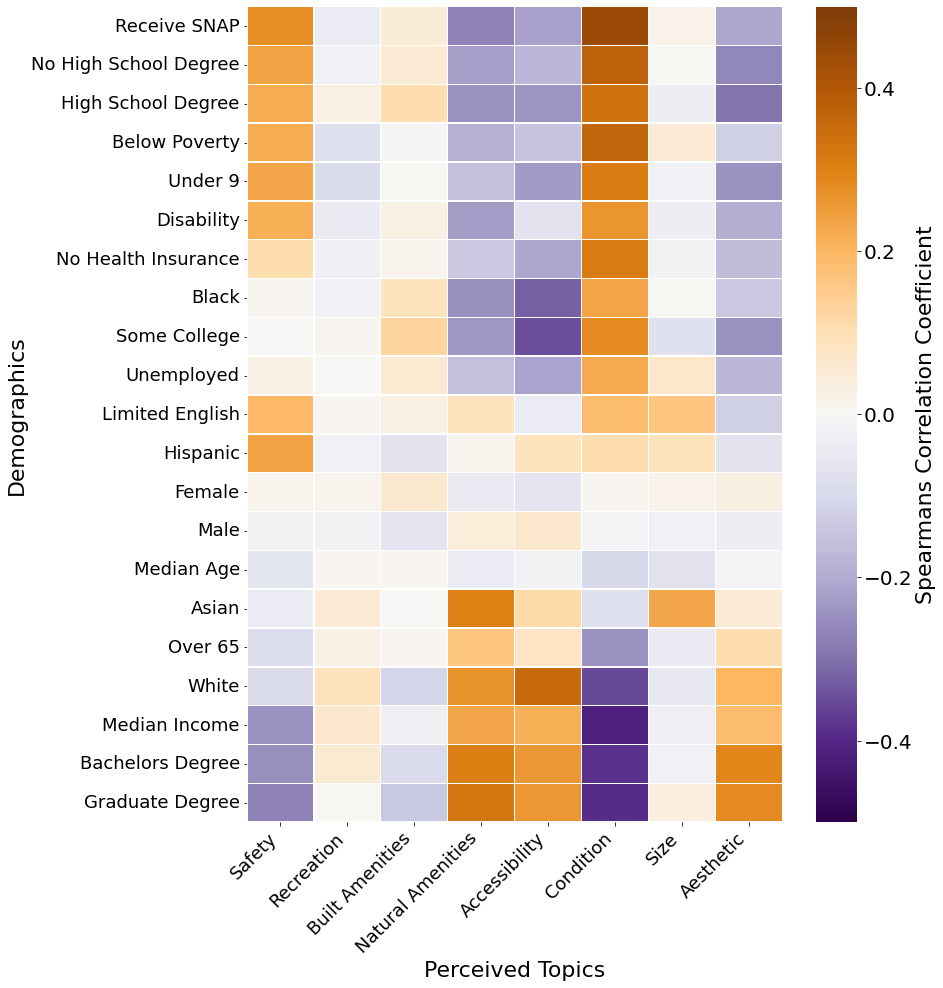

In [432]:
# Plot correlation heatmap between demographics and topic distributions for negative reviews
# Define the plot
fig, ax = plt.subplots(figsize=(12,15))

# Add title to the Heat map
title = ""

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticklabels(labels=corrMatrix.columns,color='black',size=18,rotation = 45)
ax.set_yticklabels(labels=corrMatrix.index,color='black',size=18)

# Remove the axes

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#A46B2F","#FFA649","#1BC1AF",'#348AA7'])
sns.heatmap(corrMatrix, cmap='PuOr_r', linewidths=0.5, annot=False,vmin=-.5, vmax=.5,ax=ax)
plt.xticks(rotation=45,ha='right') 
plt.ylabel('Demographics',color='black',size=22)
plt.xlabel('Perceived Topics',color='black',size=22)  
ax.figure.axes[-1].set_ylabel('Spearmans Correlation Coefficient', size=22)
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)
plt.savefig("n_review_cor_p.jpg", dpi=300,bbox_inches='tight')

#files.download('n_review_cor_p.jpg')
plt.show()

In [433]:
# P-values of correlation between demographics and topic distributions for negative reviews
pd.options.display.float_format = '{:.4f}'.format
c = access1.columns

cor, pvalue = stats.spearmanr(access1)
d1 = pd.DataFrame(pvalue)
d1.columns = c
d1.index = c
corrMatrix = d1
corrMatrix

,place_score,male,female,white,black,nat_amr,asian,pac_ilndr,hispanic,other_race,...,no_health,med_inc,t_safety,t_recreation,t_amenities,t_landscape,t_accessibility,t_condition,t_size,t_aesthetic
place_score,0.0000,0.8915,0.8915,0.0000,0.0000,0.0094,0.0001,0.5787,0.0001,0.0000,...,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.7520,0.0000
male,0.8915,0.0000,0.0000,0.0001,0.0000,0.3599,0.0007,0.3413,0.0003,0.0082,...,0.0023,0.0442,0.7248,0.7359,0.2608,0.4084,0.2302,0.8797,0.7082,0.5482
female,0.8915,0.0000,0.0000,0.0001,0.0000,0.3599,0.0007,0.3413,0.0003,0.0082,...,0.0023,0.0442,0.7248,0.7359,0.2608,0.4084,0.2302,0.8797,0.7082,0.5482
white,0.0000,0.0001,0.0001,0.0000,0.0000,0.5152,0.0000,0.6949,0.0000,0.4710,...,0.0000,0.0000,0.0780,0.0850,0.0378,0.0000,0.0000,0.0000,0.3022,0.0001
black,0.0000,0.0000,0.0000,0.0000,0.0000,0.8530,0.0000,0.8023,0.0000,0.0000,...,0.0040,0.0000,0.8806,0.6891,0.0996,0.0000,0.0000,0.0000,0.8827,0.0093
nat_amr,0.0094,0.3599,0.3599,0.5152,0.8530,0.0000,0.9065,0.4063,0.0003,0.0039,...,0.2458,0.0158,0.5208,0.1865,0.0255,0.3181,0.3336,0.3556,0.2915,0.3795
asian,0.0001,0.0007,0.0007,0.0000,0.0000,0.9065,0.0000,0.4711,0.0000,0.0001,...,0.0705,0.0000,0.4860,0.3078,0.9780,0.0000,0.0285,0.1272,0.0000,0.3203
pac_ilndr,0.5787,0.3413,0.3413,0.6949,0.8023,0.4063,0.4711,0.0000,0.6890,0.7377,...,0.3430,0.1168,0.2091,0.4135,0.7616,0.0347,0.5011,0.9767,0.0137,0.8537
hispanic,0.0001,0.0003,0.0003,0.0000,0.0000,0.0003,0.0000,0.6890,0.0000,0.0000,...,0.0000,0.0005,0.0000,0.6804,0.2015,0.7643,0.0886,0.0366,0.0727,0.1931
other_race,0.0000,0.0082,0.0082,0.4710,0.0000,0.0039,0.0001,0.7377,0.0000,0.0000,...,0.0000,0.0000,0.0003,0.5257,0.6720,0.4035,0.6881,0.0014,0.0687,0.0772


In [434]:
# Do the same for only positive reviews
# Keep only positive reviews
sc2_cor_filter_i = sc2_cor_filter[(sc2_cor_filter.score >= 4)]

# Group by park name and average topic distributions - get data from review level to park level
sc2_cor_filter_ig = sc2_cor_filter_i.groupby(['PUBLIC_NAME'])['t_safety',	't_recreation',	't_amenities',	't_landscape',	't_accessibility',	't_condition',	't_size',	't_aesthetic'].mean()
sc2_cor_filter_ig = sc2_cor_filter_ig.reset_index(level=0)

# Merge accessibility of park with z-score topic distributions
access1 = access.merge(sc2_cor_filter_ig, left_on='Public_Name',right_on='PUBLIC_NAME')

# Group by census tract and average demographic columns
access1 = access1.groupby(['GEOID_x'])['place_score','male', 'female', 'white', 'black',
       'nat_amr', 'asian', 'pac_ilndr', 'hispanic', 'other_race', 'mult_rce',
       'med_age', 'over_65', 'under_9', 'us_brn', 'natrzation', 'not_cit',
       'for_born', 'born_in_state', 'eng_lt_vw', 'lt_hs', 'hs_degree',
       'some_college', 'bach_degree', 'grad_degree', 'owned_home',
       'rented_home', 'disability', 'dis_nohealth', 'recieved_snap',
       'below_pov', 'unemployed', 'no_health', 'med_inc', 'PUBLIC_NAME_y',
       't_safety', 't_recreation', 't_amenities', 't_landscape',
       't_accessibility', 't_condition', 't_size', 't_aesthetic'].mean()
access1 = access1[access1['med_inc'].notna()]
access1 = access1[access1['t_size'].notna()]

pd.options.display.float_format = '{:.2f}'.format

corrMatrix = access1.corr(method="spearman")
corrMatrix = pd.DataFrame(corrMatrix)

corrMatrix = corrMatrix.drop(['place_score','male', 'female', 'white', 'black',
       'nat_amr', 'asian', 'pac_ilndr', 'hispanic', 'other_race', 'mult_rce',
       'med_age', 'over_65', 'under_9', 'us_brn', 'natrzation', 'not_cit',
       'for_born', 'born_in_state', 'eng_lt_vw', 'lt_hs', 'hs_degree',
       'some_college', 'bach_degree', 'grad_degree', 'owned_home',
       'rented_home', 'disability', 'dis_nohealth', 'recieved_snap',
       'below_pov', 'unemployed', 'no_health', 'med_inc'],axis=1)

corrMatrix = corrMatrix.drop(['t_safety', 't_recreation', 't_amenities', 't_landscape',
       't_accessibility', 't_condition', 't_size', 't_aesthetic','place_score','nat_amr','pac_ilndr','other_race', 'mult_rce','natrzation', 'not_cit',
       'for_born', 'born_in_state','owned_home',
       'rented_home','dis_nohealth','us_brn'],axis=0)

corrMatrix = corrMatrix.rename(index={'med_age': 'Median Age', 'over_65': 'Over 65', 'under_9': 'Under 9','male': 'Male', 'female': 'Female', 'white': 'White', 'black': 'Black',
       'asian': 'Asian', 'hispanic': 'Hispanic',
       'eng_lt_vw': 'Limited English', 'lt_hs': 'No High School Degree', 'hs_degree': 'High School Degree',
       'some_college': 'Some College', 'bach_degree': 'Bachelors Degree', 'grad_degree': 'Graduate Degree',
       'disability': 'Disability','recieved_snap': 'Receive SNAP',
       'below_pov': 'Below Poverty', 'unemployed': 'Unemployed', 'no_health': 'No Health Insurance', 'med_inc': 'Median Income'})

corrMatrix = corrMatrix.rename(columns={'t_safety': 'Safety','t_recreation': 'Recreation', 't_amenities': 'Built Amenities', 't_landscape': 'Natural Amenities', 't_accessibility': 'Accessibility',
       't_condition': 'Condition', 't_size': 'Size', 't_aesthetic': 'Aesthetic'})
corrMatrix = corrMatrix.reindex(['Receive SNAP','No High School Degree','High School Degree','Below Poverty','Under 9', 'Disability','No Health Insurance',
'Black',  'Some College','Unemployed','Limited English','Hispanic','Female','Male','Median Age','Asian', 'Over 65','White',
'Median Income','Bachelors Degree','Graduate Degree'])

corrMatrix


<ipython-input-434-69b23b6517df>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sc2_cor_filter_ig = sc2_cor_filter_i.groupby(['PUBLIC_NAME'])['t_safety',	't_recreation',	't_amenities',	't_landscape',	't_accessibility',	't_condition',	't_size',	't_aesthetic'].mean()


,Safety,Recreation,Built Amenities,Natural Amenities,Accessibility,Condition,Size,Aesthetic
Receive SNAP,0.23,0.11,-0.07,-0.33,-0.18,0.30,-0.14,-0.26
No High School Degree,0.22,0.08,0.06,-0.28,-0.16,0.29,-0.09,-0.27
High School Degree,0.15,0.16,0.03,-0.28,-0.18,0.26,-0.18,-0.35
Below Poverty,0.20,0.00,-0.09,-0.22,-0.26,0.20,-0.06,-0.10
Under 9,0.21,0.07,-0.00,-0.30,-0.11,0.34,-0.11,-0.24
Disability,0.17,0.11,-0.05,-0.27,-0.11,0.26,-0.25,-0.18
No Health Insurance,0.18,0.14,0.01,-0.17,-0.07,0.18,-0.03,-0.24
Black,-0.02,0.30,-0.15,-0.22,-0.34,0.02,-0.22,-0.13
Some College,0.08,0.28,0.08,-0.27,-0.20,0.19,-0.14,-0.30
Unemployed,0.15,0.17,-0.03,-0.10,-0.14,0.16,-0.14,-0.16


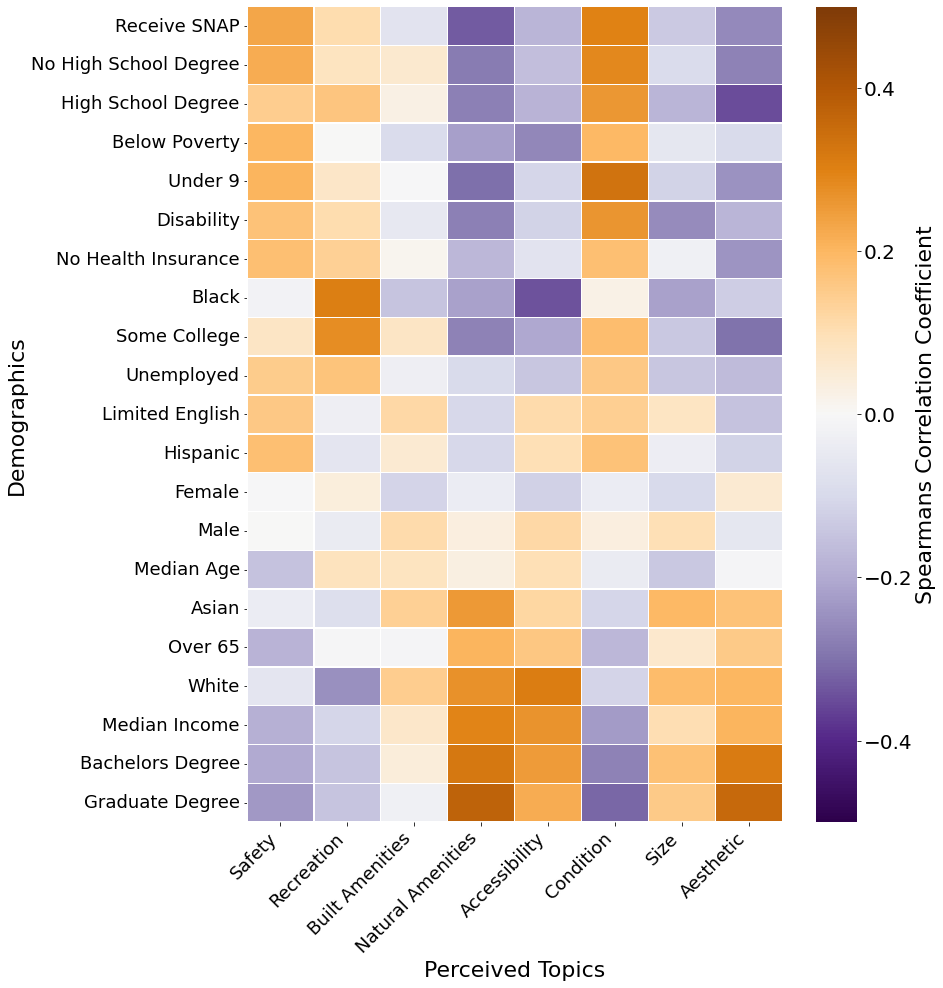

In [435]:
# Plot correlation heatmap between demographics and topic distributions for positive reviews
# Define the plot
fig, ax = plt.subplots(figsize=(12,15))

# Add title to the Heat map
title = ""

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticklabels(labels=corrMatrix.columns,color='black',size=18,rotation = 45)
ax.set_yticklabels(labels=corrMatrix.index,color='black',size=18)

# Remove the axes

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#A46B2F","#FFA649","#1BC1AF",'#348AA7'])
sns.heatmap(corrMatrix, cmap='PuOr_r', linewidths=0.5, annot=False,vmin=-.5, vmax=.5,ax=ax)
plt.xticks(rotation=45,ha='right') 
plt.ylabel('Demographics',color='black',size=22)
plt.xlabel('Perceived Topics',color='black',size=22)  
ax.figure.axes[-1].set_ylabel('Spearmans Correlation Coefficient', size=22)
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)
plt.savefig("n_review_cor_p.jpg", dpi=300,bbox_inches='tight')

#files.download('n_review_cor_p.jpg')
plt.show()

In [436]:
# P-values of correlation between demographics and topic distributions for positive reviews
pd.options.display.float_format = '{:.4f}'.format
c = access1.columns

cor, pvalue = stats.spearmanr(access1)
d1 = pd.DataFrame(pvalue)
d1.columns = c
d1.index = c
corrMatrix = d1
corrMatrix

,place_score,male,female,white,black,nat_amr,asian,pac_ilndr,hispanic,other_race,...,no_health,med_inc,t_safety,t_recreation,t_amenities,t_landscape,t_accessibility,t_condition,t_size,t_aesthetic
place_score,0.0000,0.8830,0.8830,0.0000,0.0000,0.0234,0.0001,0.6721,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0317,0.0088,0.0000,0.1498,0.0000,0.1783,0.0000
male,0.8830,0.0000,0.0000,0.0000,0.0000,0.3923,0.0011,0.3648,0.0002,0.0075,...,0.0020,0.0477,0.9571,0.4122,0.0295,0.4898,0.0222,0.4671,0.0587,0.2850
female,0.8830,0.0000,0.0000,0.0000,0.0000,0.3923,0.0011,0.3648,0.0002,0.0075,...,0.0020,0.0477,0.9571,0.4122,0.0295,0.4898,0.0222,0.4671,0.0587,0.2850
white,0.0000,0.0000,0.0000,0.0000,0.0000,0.5129,0.0000,0.6974,0.0000,0.4779,...,0.0000,0.0000,0.2487,0.0000,0.0052,0.0000,0.0000,0.0328,0.0003,0.0001
black,0.0000,0.0000,0.0000,0.0000,0.0000,0.8543,0.0000,0.7962,0.0000,0.0000,...,0.0041,0.0000,0.7078,0.0000,0.0044,0.0000,0.0000,0.6441,0.0000,0.0143
nat_amr,0.0234,0.3923,0.3923,0.5129,0.8543,0.0000,0.8596,0.3885,0.0004,0.0040,...,0.2632,0.0151,0.6940,0.3984,0.2095,0.0026,0.6210,0.2339,0.1171,0.0193
asian,0.0001,0.0011,0.0011,0.0000,0.0000,0.8596,0.0000,0.4921,0.0000,0.0002,...,0.0747,0.0000,0.4768,0.0993,0.0067,0.0000,0.0193,0.0367,0.0001,0.0008
pac_ilndr,0.6721,0.3648,0.3648,0.6974,0.7962,0.3885,0.4921,0.0000,0.7106,0.7444,...,0.3448,0.1157,0.2187,0.7240,0.1225,0.0608,0.1957,0.0722,0.4925,0.6644
hispanic,0.0000,0.0002,0.0002,0.0000,0.0000,0.0004,0.0000,0.7106,0.0000,0.0000,...,0.0000,0.0006,0.0005,0.2412,0.2659,0.0436,0.0585,0.0008,0.5480,0.0288
other_race,0.0000,0.0075,0.0075,0.4779,0.0000,0.0040,0.0002,0.7444,0.0000,0.0000,...,0.0000,0.0000,0.0007,0.8803,0.1289,0.0054,0.7837,0.0001,0.5110,0.0086


In [442]:
# Rename and reindex data for plot
access1 = access1[['place_score','t_safety', 't_recreation', 't_amenities', 't_landscape',
       't_accessibility', 't_condition', 't_size', 't_aesthetic']]
corrMatrix1 = access1.corr(method="spearman")
corrMatrix1 = pd.DataFrame(corrMatrix1)

corrMatrix1 = corrMatrix1.rename(index={'place_score': 'Park Score','t_safety': '***Safety','t_recreation': 'Recreation', 't_amenities': '***Built Amenities', 't_landscape': '***Natural Amenities', 't_accessibility': '**Accessibility',
       't_condition': '***Condition', 't_size': 'Size', 't_aesthetic': '***Aesthetic'})
corrMatrix1 = corrMatrix1.drop(['Park Score'],axis=0)
corrMatrix1 = corrMatrix1.reindex(['***Aesthetic', '***Natural Amenities', '**Accessibility', 'Size','***Built Amenities','***Safety','***Condition'])
corrMatrix1

,place_score,t_safety,t_recreation,t_amenities,t_landscape,t_accessibility,t_condition,t_size,t_aesthetic
***Aesthetic,0.53613829,-0.34819393,-0.08150931,-0.42502505,0.64518371,0.01824227,-0.41748735,0.04554223,1.00000000
***Natural Amenities,0.50067483,-0.18344805,-0.14090115,-0.30764243,1.00000000,0.17268472,-0.43302052,0.06462299,0.64518371
**Accessibility,0.07491589,-0.04105581,-0.26723570,-0.07729313,0.17268472,1.00000000,-0.08242769,0.11967764,0.01824227
Size,0.07002784,-0.12195387,-0.20737737,0.16660850,0.06462299,0.11967764,-0.24873821,1.00000000,0.04554223
***Built Amenities,-0.13592178,0.19192975,-0.08062170,1.00000000,-0.30764243,-0.07729313,0.30036019,0.16660850,-0.42502505
***Safety,-0.21842704,1.00000000,-0.07758242,0.19192975,-0.18344805,-0.04105581,0.50487853,-0.12195387,-0.34819393
***Condition,-0.48759184,0.50487853,-0.10976220,0.30036019,-0.43302052,-0.08242769,1.00000000,-0.24873821,-0.41748735


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

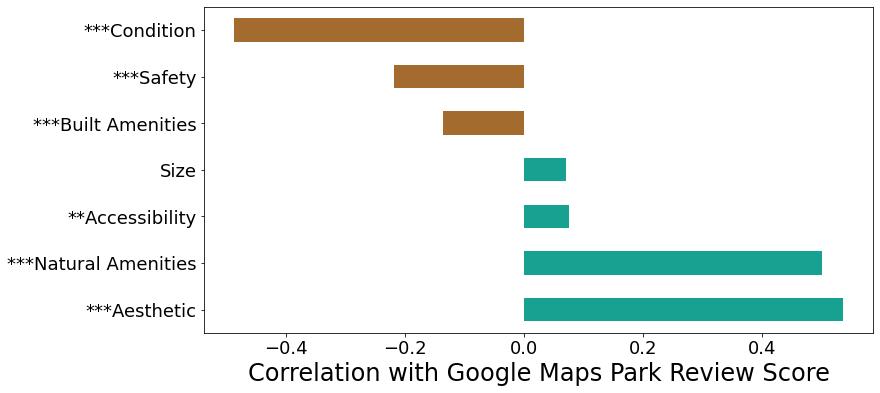

In [443]:
#corr = corr.drop(['Park Score'])
plt.rcParams["figure.figsize"] = (12,6)
# '#5dd39e', '#513b56'
corrMatrix1['place_score'].plot(kind='barh', y='Place Score', color=('#17A191','#17A191','#17A191','#17A191','#A46B2F','#A46B2F','#A46B2F','#A46B2F'))
plt.grid(False)
plt.rc('axes', axisbelow=True)

plt.xlabel('Correlation with Google Maps Park Review Score', fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)



plt.savefig("demo_correlation_10_9_22_n.jpg", dpi=300,bbox_inches='tight')

files.download('demo_correlation_10_9_22_n.jpg')

In [444]:
# P-values for topics and park score correlation
pd.options.display.float_format = '{:.8f}'.format
c = access1.columns

cor, pvalue = stats.spearmanr(access1)
d1 = pd.DataFrame(pvalue)
d1.columns = c
d1.index = c
d1

,place_score,t_safety,t_recreation,t_amenities,t_landscape,t_accessibility,t_condition,t_size,t_aesthetic
place_score,0.00000000,0.00002192,0.03165881,0.00875747,0.00000000,0.14982863,0.00000000,0.17832423,0.00000000
t_safety,0.00002192,0.00000000,0.13581737,0.00020002,0.00038272,0.43043080,0.00000000,0.01878107,0.00000000
t_recreation,0.03165881,0.13581737,0.00000000,0.12110125,0.00656057,0.00000017,0.03456446,0.00005704,0.11704668
t_amenities,0.00875747,0.00020002,0.12110125,0.00000000,0.00000000,0.13728685,0.00000000,0.00127826,0.00000000
t_landscape,0.00000000,0.00038272,0.00656057,0.00000000,0.00000000,0.00083765,0.00000000,0.21430120,0.00000000
t_accessibility,0.14982863,0.43043080,0.00000017,0.13728685,0.00083765,0.00000000,0.11296403,0.02112919,0.72617777
t_condition,0.00000000,0.00000000,0.03456446,0.00000000,0.00000000,0.11296403,0.00000000,0.00000123,0.00000000
t_size,0.17832423,0.01878107,0.00005704,0.00127826,0.21430120,0.02112919,0.00000123,0.00000000,0.38173762
t_aesthetic,0.00000000,0.00000000,0.11704668,0.00000000,0.00000000,0.72617777,0.00000000,0.38173762,0.00000000
